In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

red_wine_file = "/content/sample_data/winequality-red.csv"
white_wine_file = "/content/sample_data/winequality-white.csv"

# imposta il tema di default di seaborn
sns.set_theme()

ANALISI ESPLORATIVA (EDA)

In [ ]:
# Usa il punto e virgola come separatore
df_red_wine = pd.read_csv(red_wine_file, sep = ';')
df_white_wine = pd.read_csv(white_wine_file, sep = ';')

# Rinomina le colonne sostituendo gli spazi con underscore
df_red_wine = df_red_wine.rename(columns=lambda x: x.replace(' ', '_'))
df_white_wine = df_white_wine.rename(columns=lambda x: x.replace(' ', '_'))


display(df_red_wine)

fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free_sulfur_dioxide  total_sulfur_dioxide  density    pH  sulphates  \
0                    11.0                  34.0  0.99780  3.51       0.56   
1                    25.0                  67.0  0.99680  3.20       0.68   
2                    15.0                  54.0  0.99700  3.26       0.65   
3                    17.0                  60.0  0.99800  3.16       0.58   
4                    11.0                  34.0  0.99780  3.51       0.56   
...                   ...                   ...      ...   ...        ...   
1594                 32.0                  44.0  0.99490  3.45       0.58   
1595                 39.0                  51.0  0.99512  3.52       0.76   
1596                 29.0                  40.0  0.99574  3.42       0.75   
1597                 32.0                  44.0  0.99547  3.57       0.71   
1598                 18.0                  42.0  0.99549  3.39       0.66   

      alcohol  quality  
0         9.4        5  
1         9.8        5  
2         9.8        5  
3         9.8        6  
4         9.4        5  
...       ...      ...  
1594     10.5        5  
1595     11.2        6  
1596     11.0        6  
1597     10.2        5  
1598     11.0        6  

[1599 rows x 12 columns]

DataViz red_wine

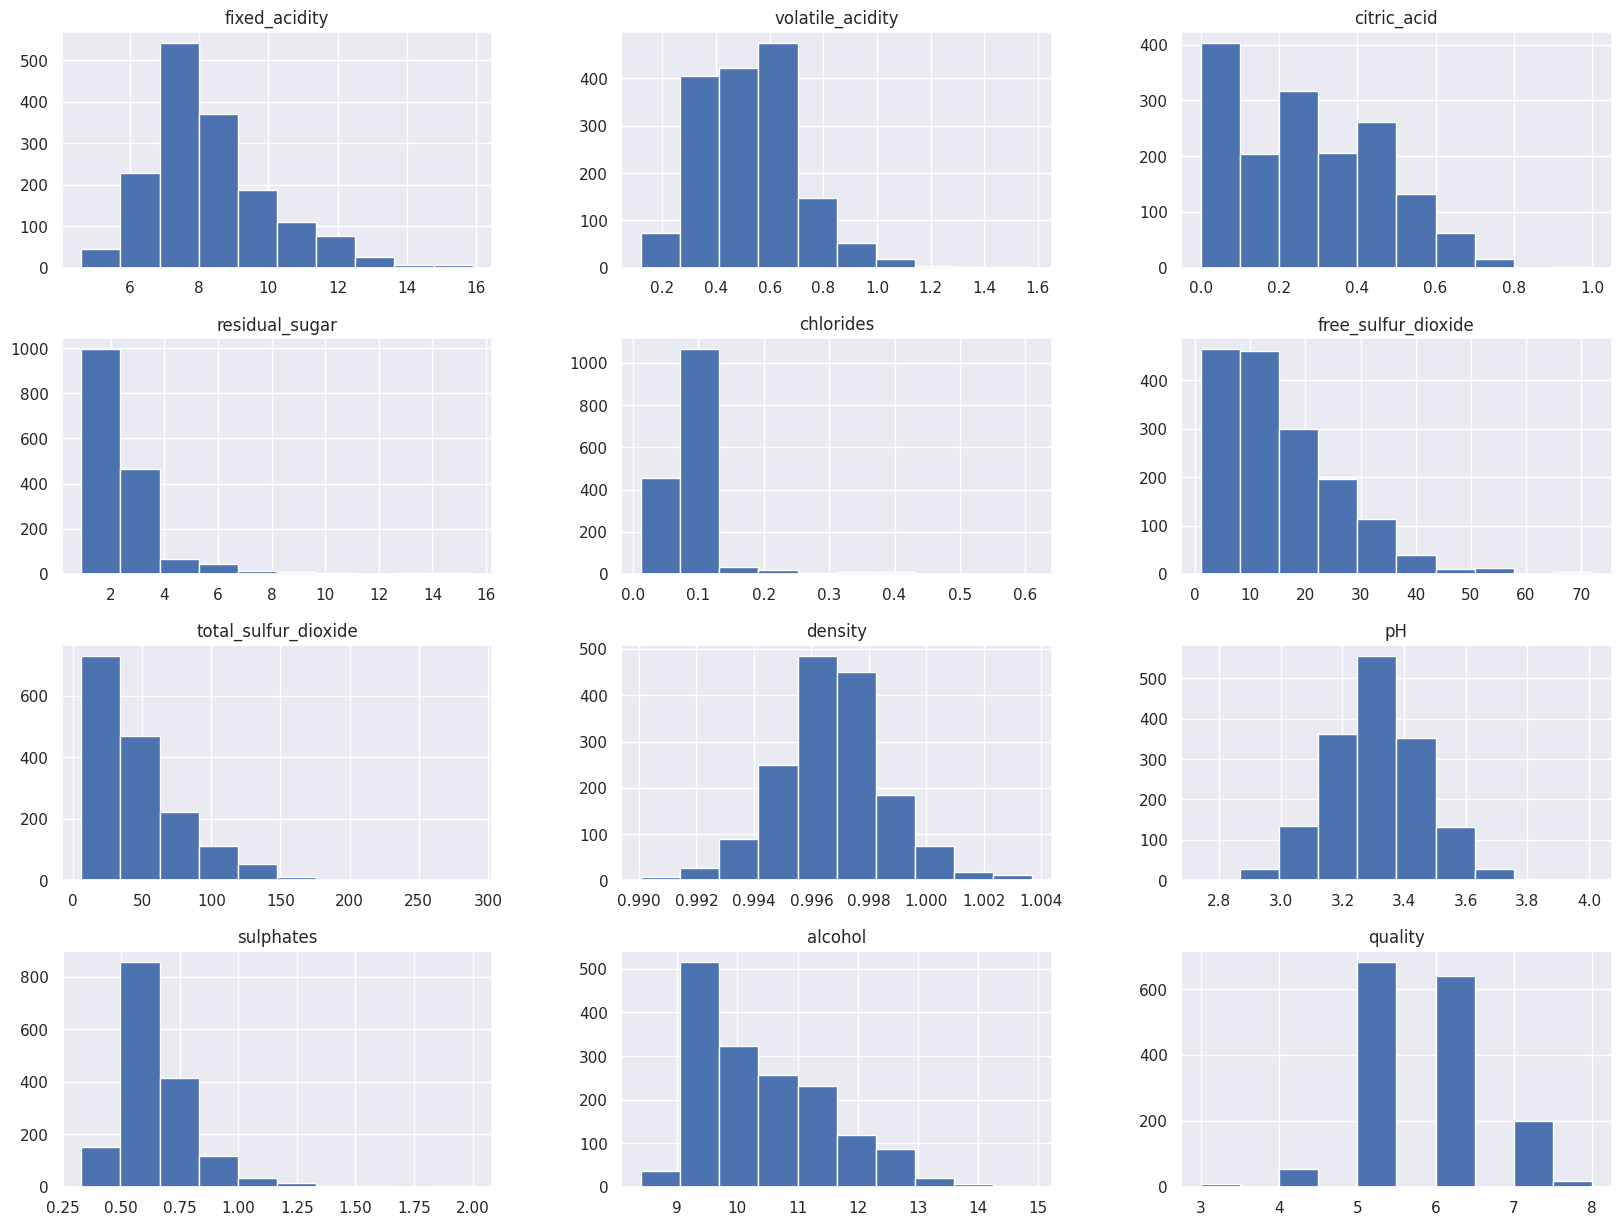

In [ ]:
df_red_wine.hist(figsize=(20,15))
plt.show()

DataViz white_wine

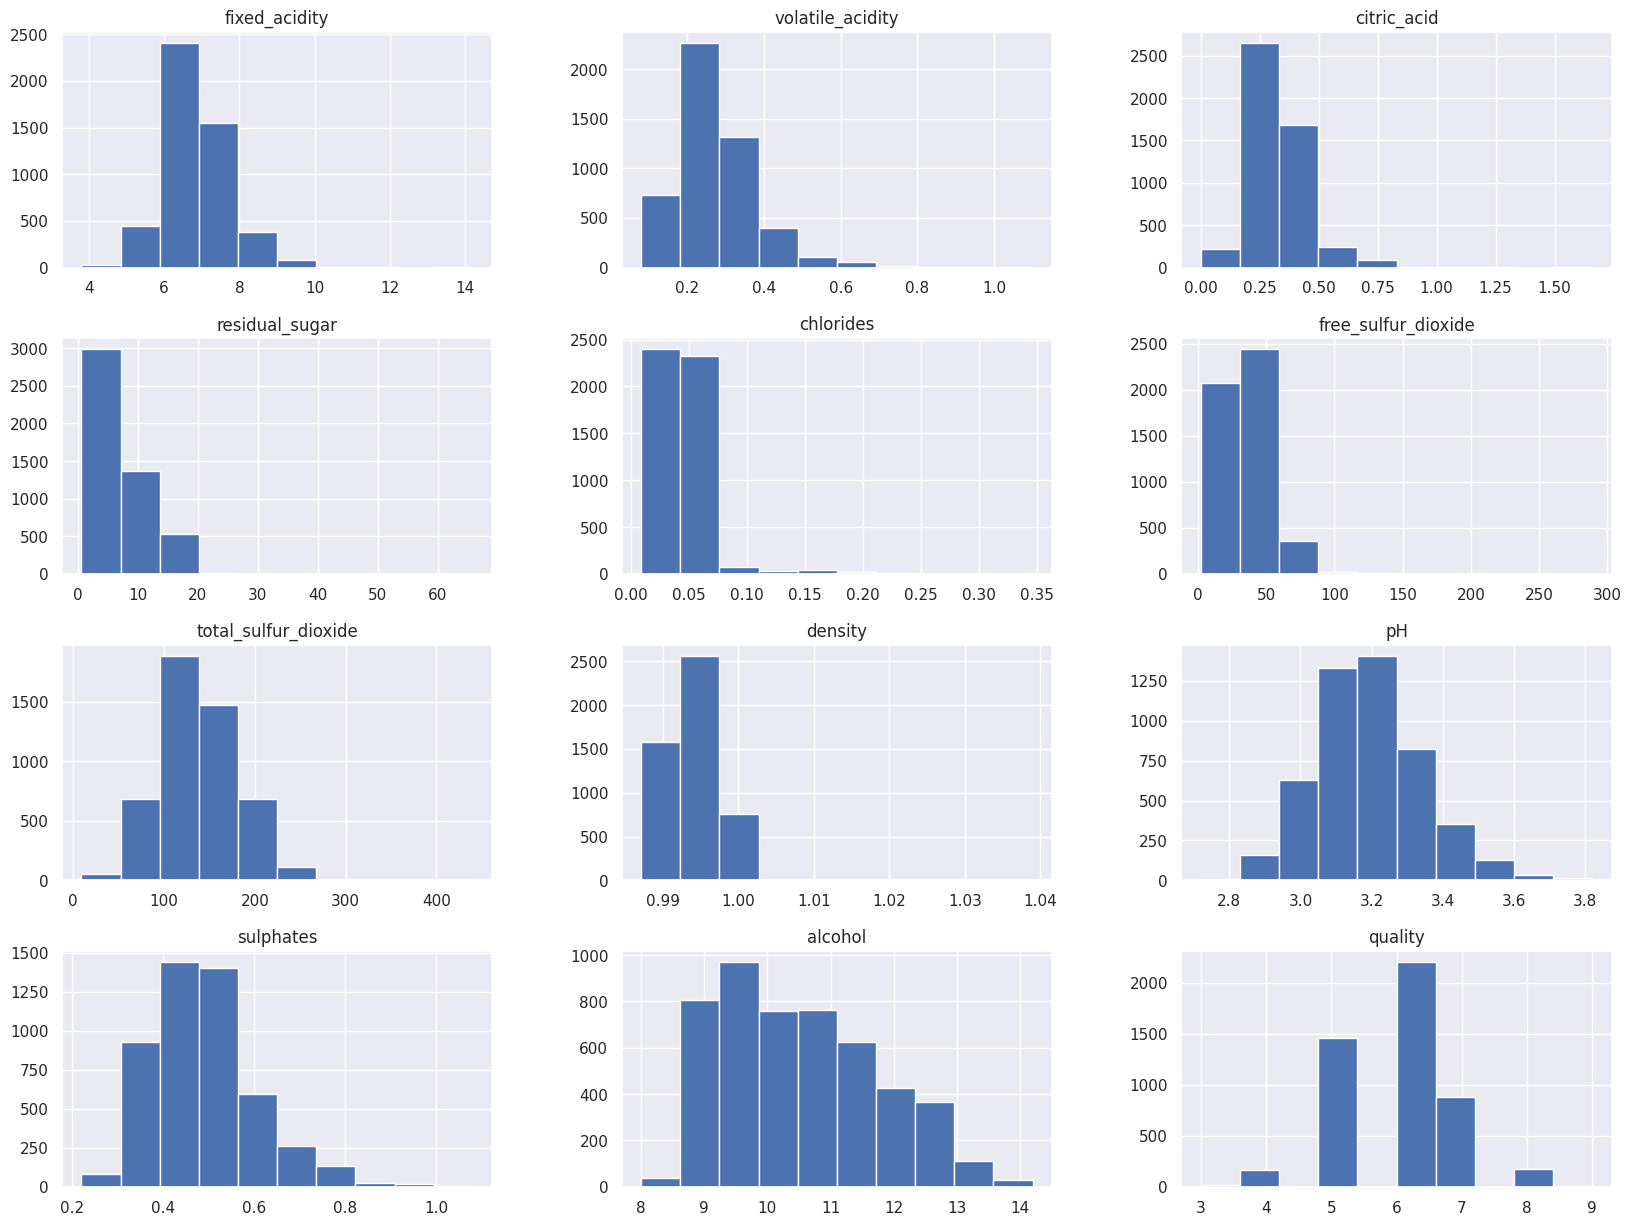

In [ ]:
df_white_wine.hist(figsize=(20,15))
plt.show()

Utilities

In [ ]:
def normal_distribution_limits(data: pd.DataFrame):
  mean = data.mean()
  std  = data.std()

  up_limit = mean + std
  low_limit = mean - std

  return mean, up_limit, low_limit



def plot_normal_distribution(data: pd.DataFrame, mean: float, up_limit: float, low_limit: float):
    plt.figure(figsize=(12, 8))
    plt.scatter(np.arange(len(data)),data, alpha=0.5)
    # terza deviazione standard postitiva
    plt.axhline(up_limit, color = 'brown', linestyle = '-', label='up limit')
    # media
    plt.axhline(mean, color = 'r', linestyle = '-', label='mean')
    # terza deviazione standard negativa
    plt.axhline(low_limit, color = 'brown', linestyle = '-', label='low limit')
    plt.legend()
    plt.show()

def interquartile_range_limits(data: pd.DataFrame):
  q25 = data.quantile(0.25)
  q75 = data.quantile(0.75)

  iqr  = (q75 - q25)
  up_limit  = q75 + iqr * 1.5
  low_limit = q25 - iqr * 1.5

  return up_limit, low_limit


def plot_generic_distribution(data: pd.DataFrame,  up_limit: float, low_limit: float) :
  plt.figure(figsize=(12, 8))
  plt.scatter(np.arange(len(data)),data, alpha=0.5)
  # up limit
  plt.axhline(up_limit, color = 'brown', linestyle = '-', label='up_limit')
  # low limit
  plt.axhline(low_limit, color = 'brown', linestyle = '-', label = 'low limit')
  plt.legend()
  plt.show()

def plot_scatter(data):
  plt.figure(figsize=(12, 8))
  plt.scatter(np.arange(len(data)),data, alpha=0.5)
  plt.show()

def plot_scatter_2(x, y):
    plt.figure(figsize=(12, 8))
    plt.scatter(x, y, alpha=0.5)
    plt.show()

studio delle variabili

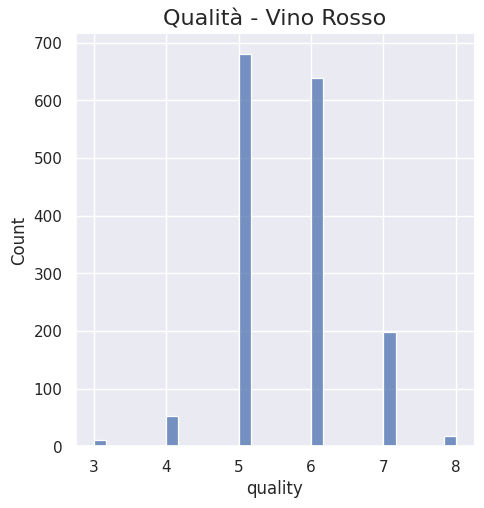

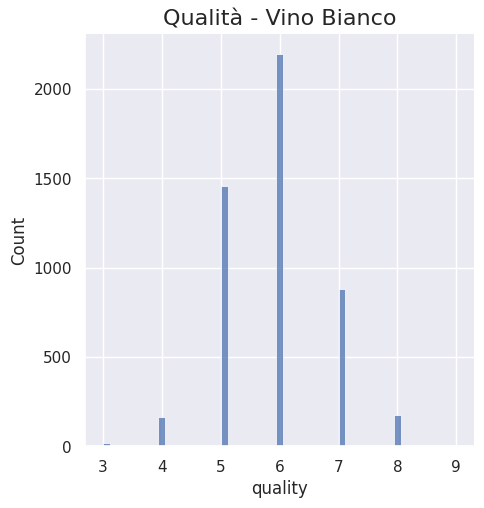

In [ ]:
#indaghiamo le variabili quality
df_quality_red_wine = df_red_wine["quality"]
df_quality_white_wine = df_white_wine["quality"]

#Forma della distribuzione red_wine
sns.displot(df_quality_red_wine)
plt.title('Qualità - Vino Rosso', fontsize=16)  # Aggiungo il titolo
plt.show()

#Forma della distribuzione white_wine
sns.displot(df_quality_white_wine)
plt.title('Qualità - Vino Bianco', fontsize=16)  # Aggiungo il titolo
plt.show()

indici statistici

In [ ]:
display(df_quality_red_wine.describe())
print("Vino Rosso")

display(df_quality_white_wine.describe())
print("Vino Bianco")


count    1599.000000
mean        5.636023
std         0.807569
min         3.000000
25%         5.000000
50%         6.000000
75%         6.000000
max         8.000000
Name: quality, dtype: float64

Vino Rosso


count    4898.000000
mean        5.877909
std         0.885639
min         3.000000
25%         5.000000
50%         6.000000
75%         6.000000
max         9.000000
Name: quality, dtype: float64

Vino Bianco


Questo codice crea un grafico a dispersione per ogni colonna nel DataFrame df_red_wine. Per ogni colonna, calcola prima i limiti dello scarto interquartile utilizzando la funzione interquartile_range_limits.

Creazione del grafico per la colonna: fixed_acidity


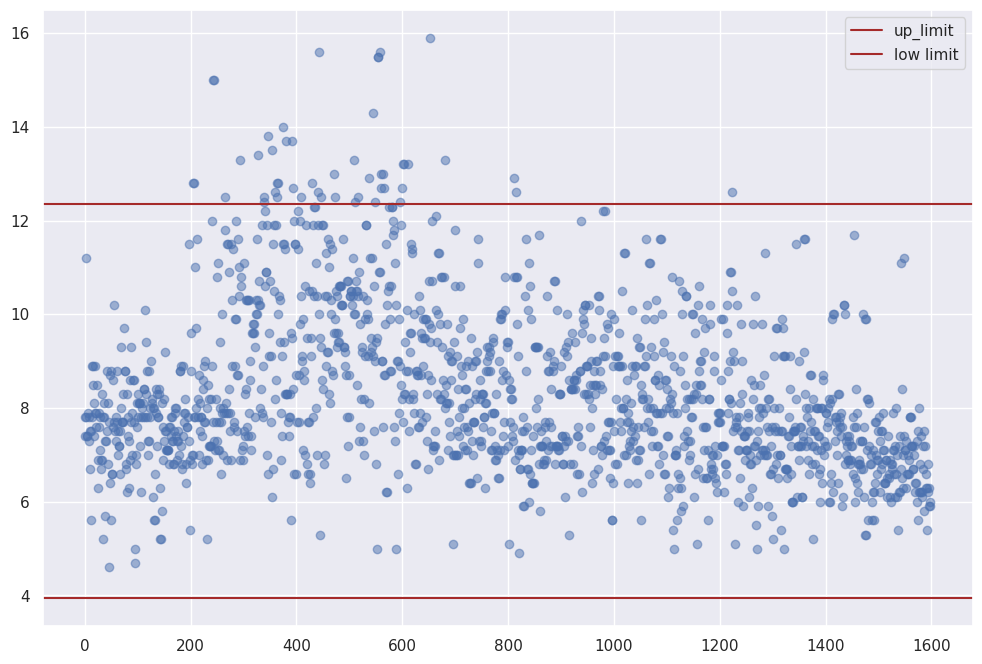

Creazione del grafico per la colonna: volatile_acidity


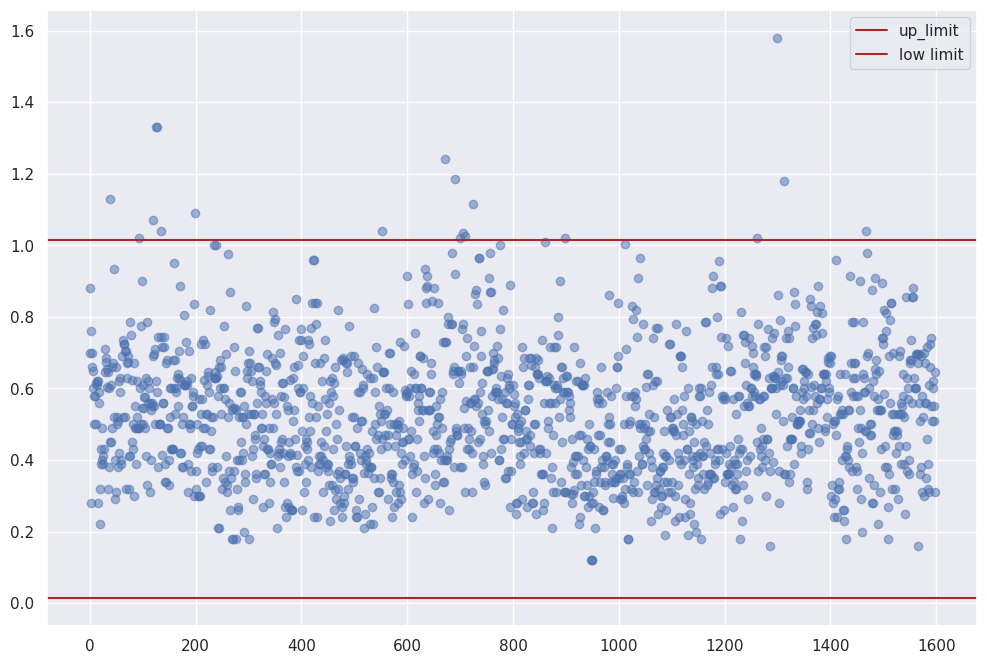

Creazione del grafico per la colonna: citric_acid


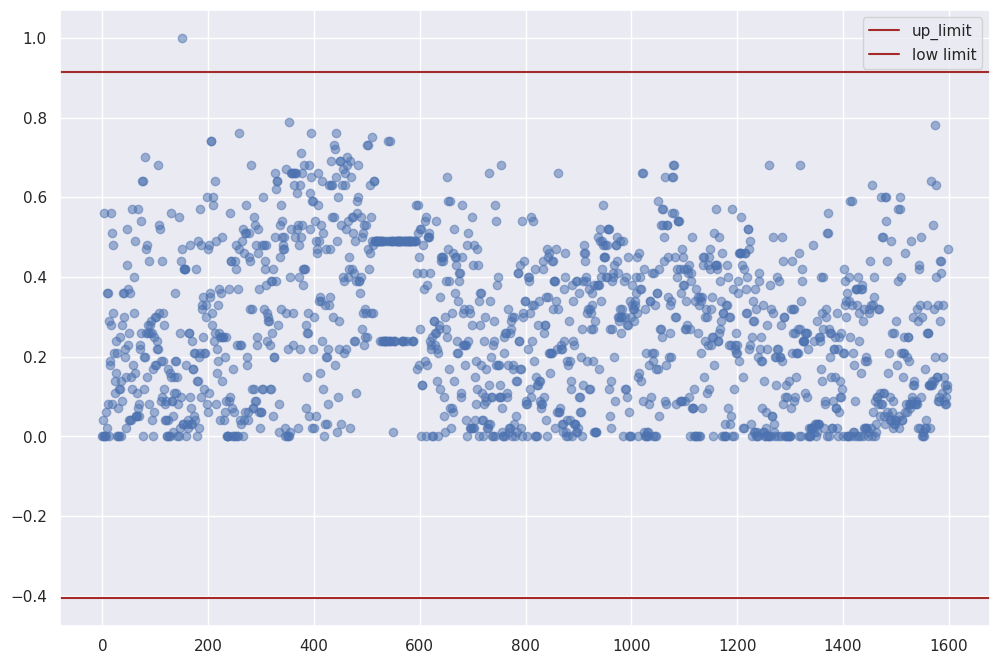

Creazione del grafico per la colonna: residual_sugar


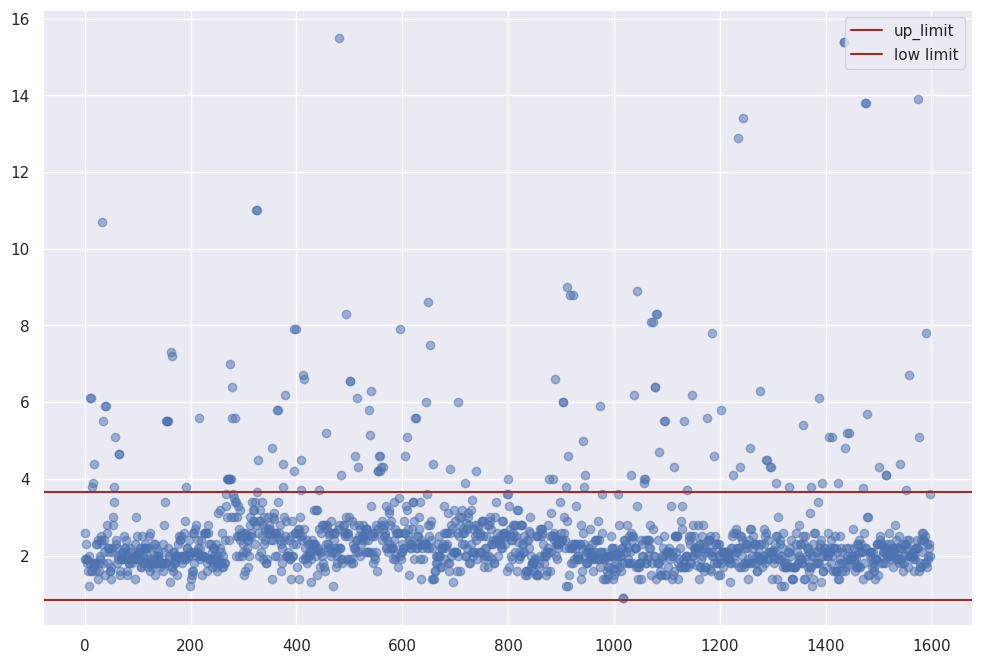

Creazione del grafico per la colonna: chlorides


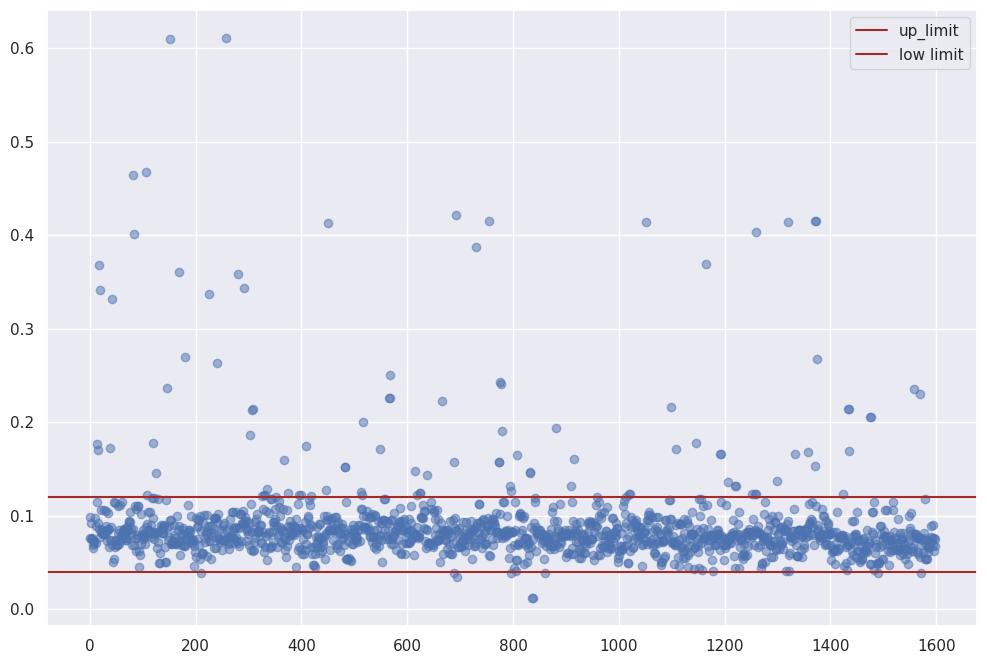

Creazione del grafico per la colonna: free_sulfur_dioxide


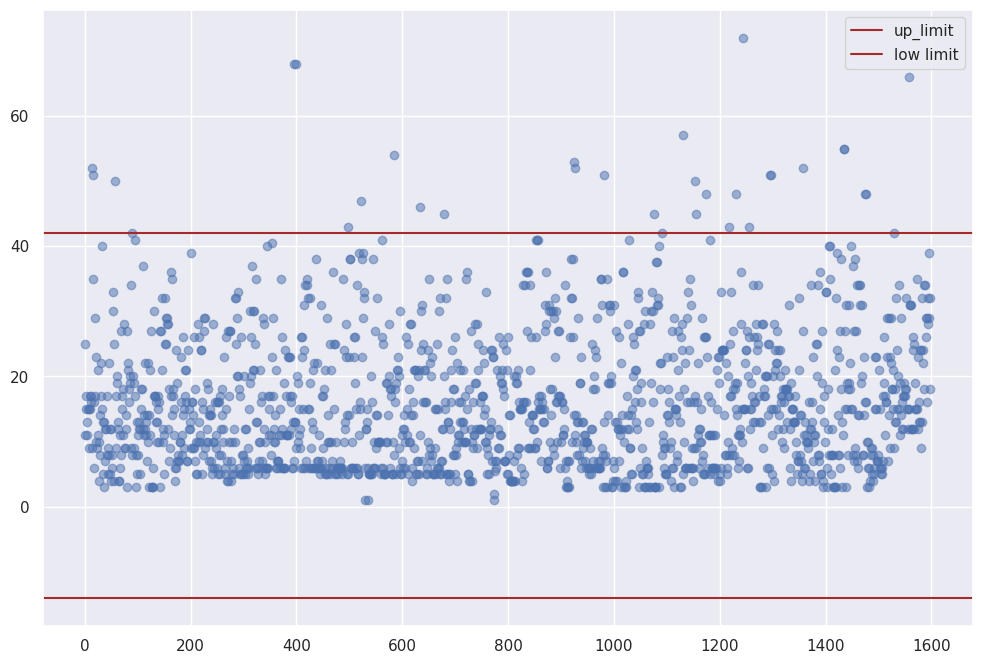

Creazione del grafico per la colonna: total_sulfur_dioxide


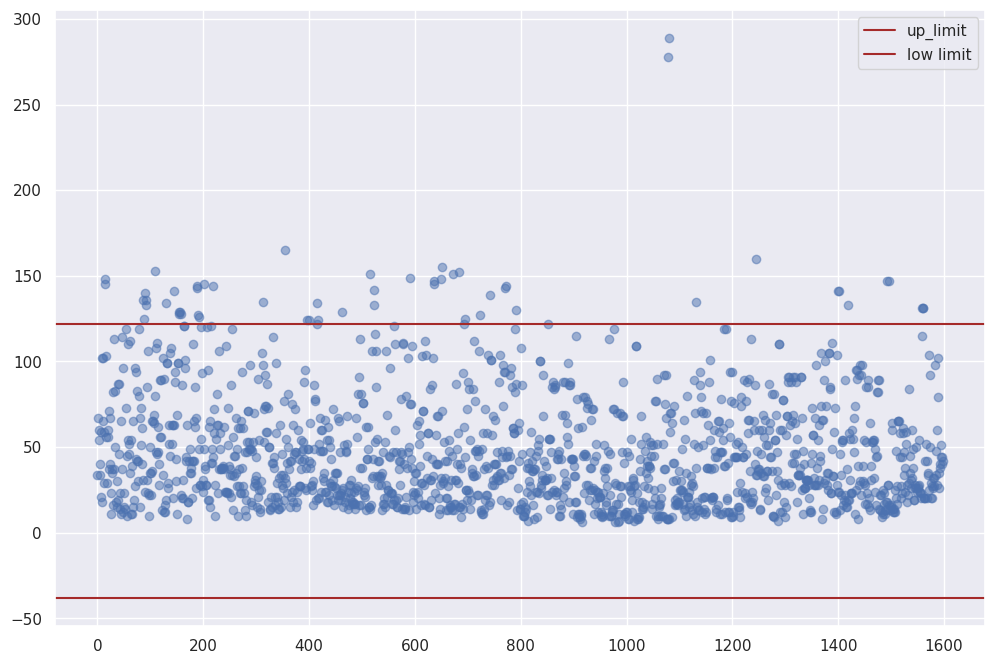

Creazione del grafico per la colonna: density


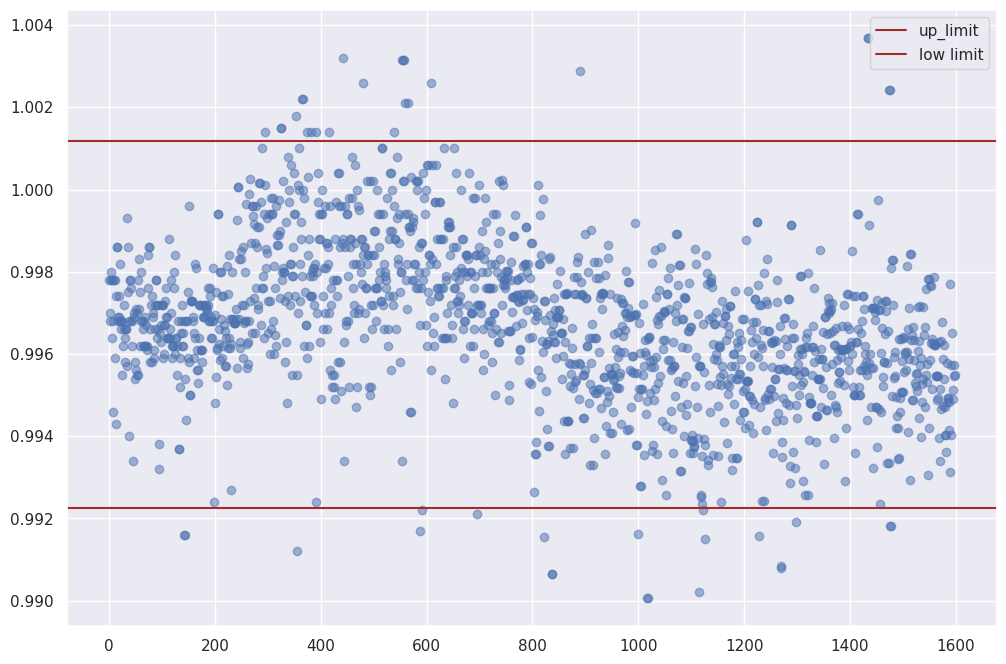

Creazione del grafico per la colonna: pH


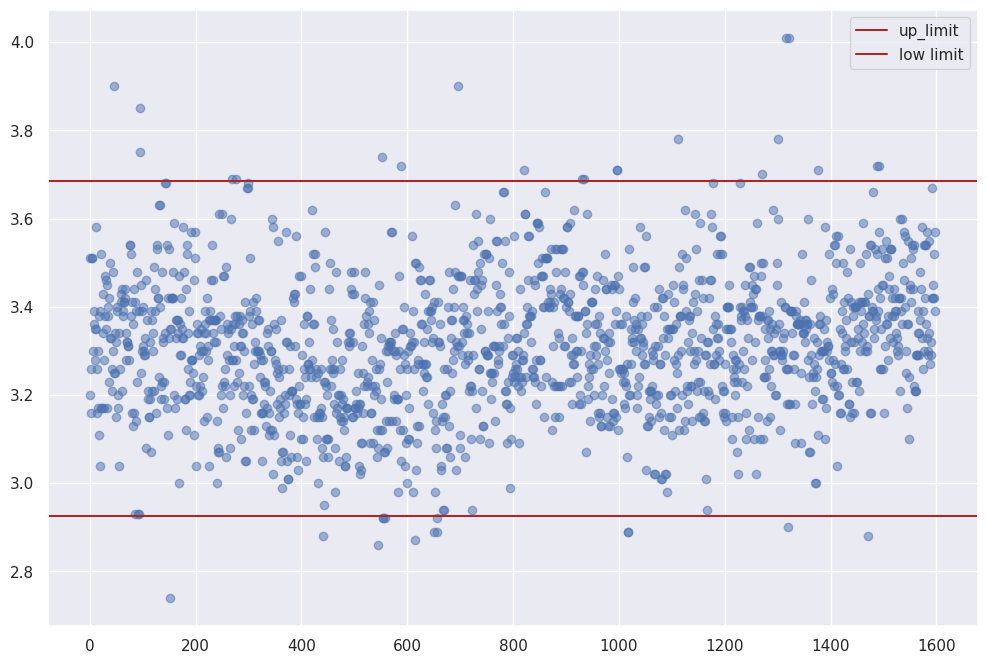

Creazione del grafico per la colonna: sulphates


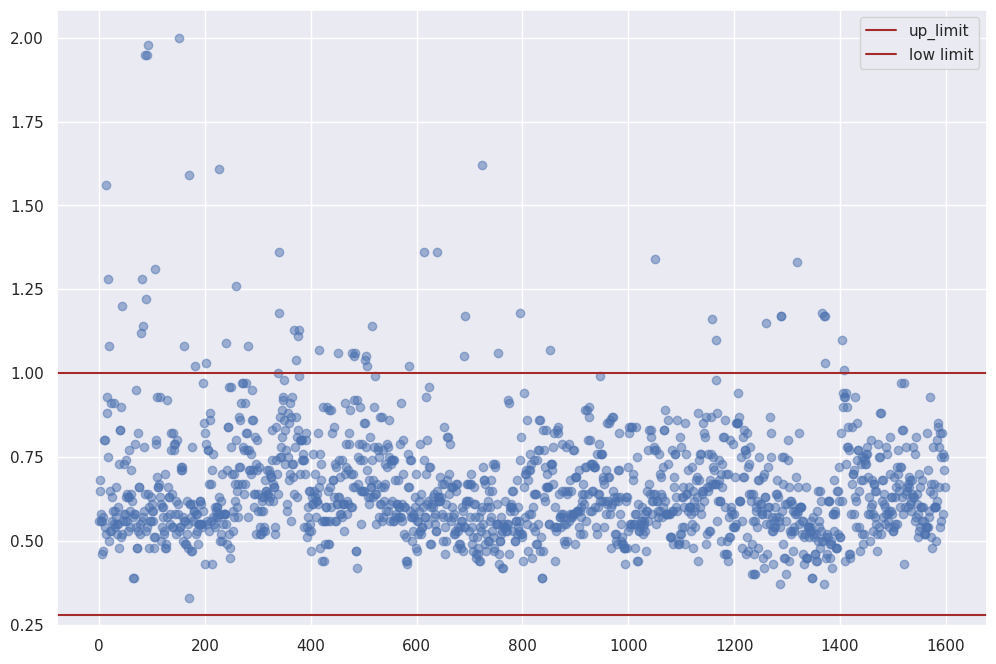

Creazione del grafico per la colonna: alcohol


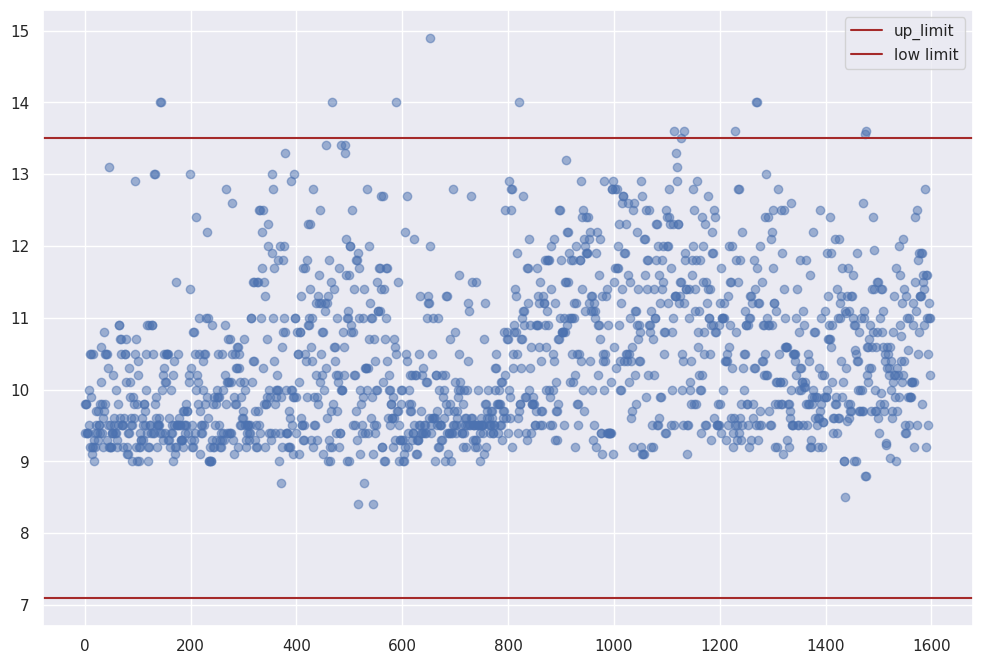

Creazione del grafico per la colonna: quality


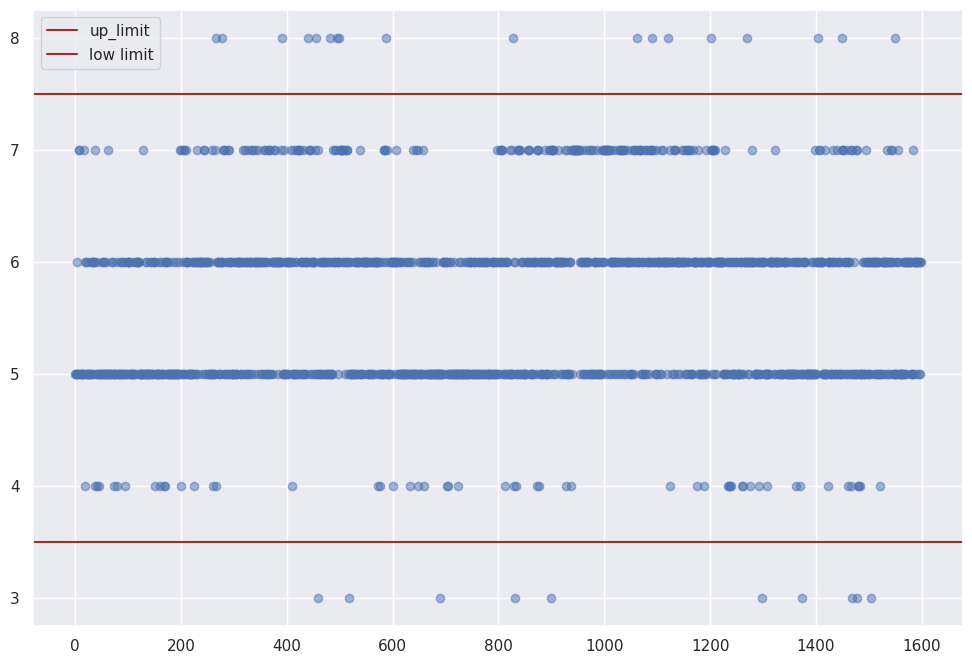

'\n# limiti dello scarto interquartile\nquality_rw_up_limit, Quality_rw_low_limit = interquartile_range_limits(df_red_wine)\n\n# plot\nplot_generic_distribution(df_red_wine, quality_rw_up_limit, Quality_rw_low_limit)\n'

In [ ]:
for column in df_red_wine.columns:
    data = df_red_wine[column]
    up_limit, low_limit = interquartile_range_limits(data)
    # Calcola i limiti dello scarto interquartile per i dati di quella colonna
    print(f"Creazione del grafico per la colonna di red_wine: {column}")
    # Crea un grafico a dispersione per i dati di quella colonna, con i limiti dello scarto interquartile
    plot_generic_distribution(data, up_limit, low_limit)

Questo codice crea un grafico a dispersione per ogni colonna nel DataFrame df_white_wine. Per ogni colonna, calcola prima i limiti dello scarto interquartile utilizzando la funzione interquartile_range_limits.

Creazione del grafico per la colonna di white_wine: fixed_acidity


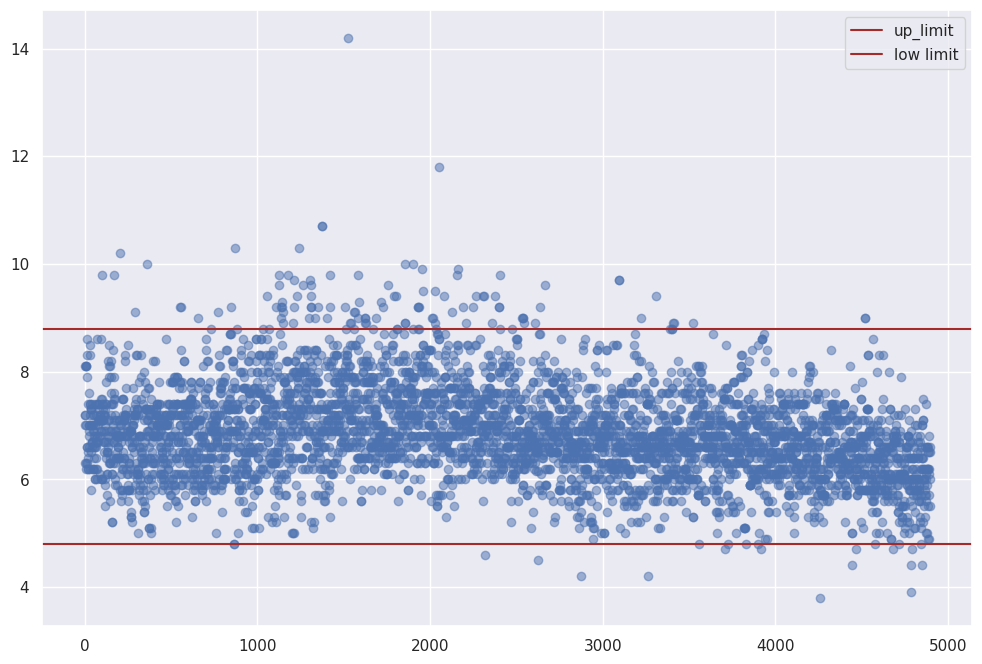

Creazione del grafico per la colonna di white_wine: volatile_acidity


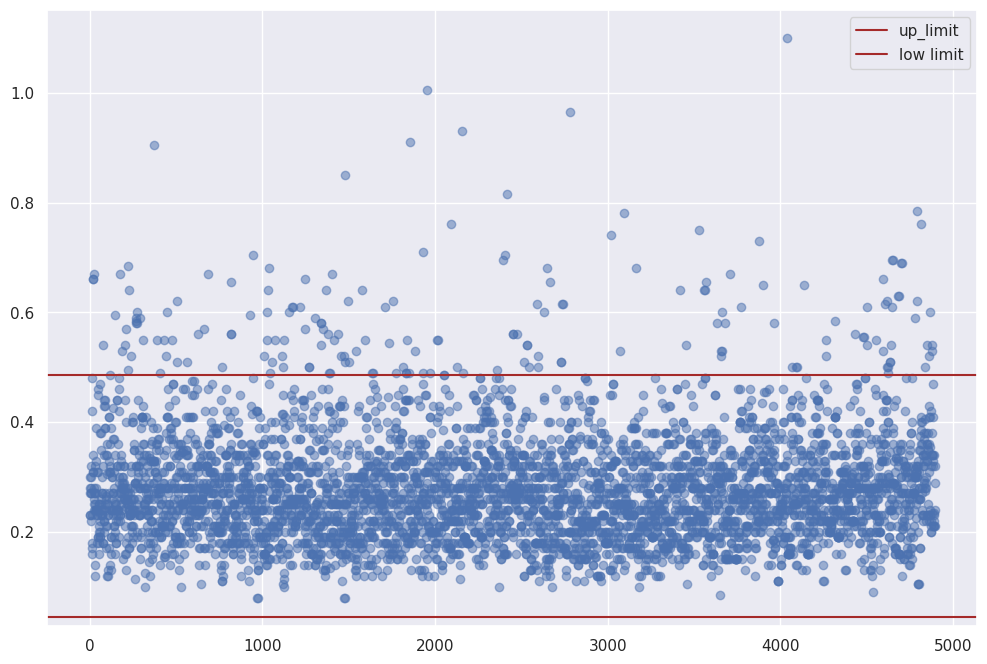

Creazione del grafico per la colonna di white_wine: citric_acid


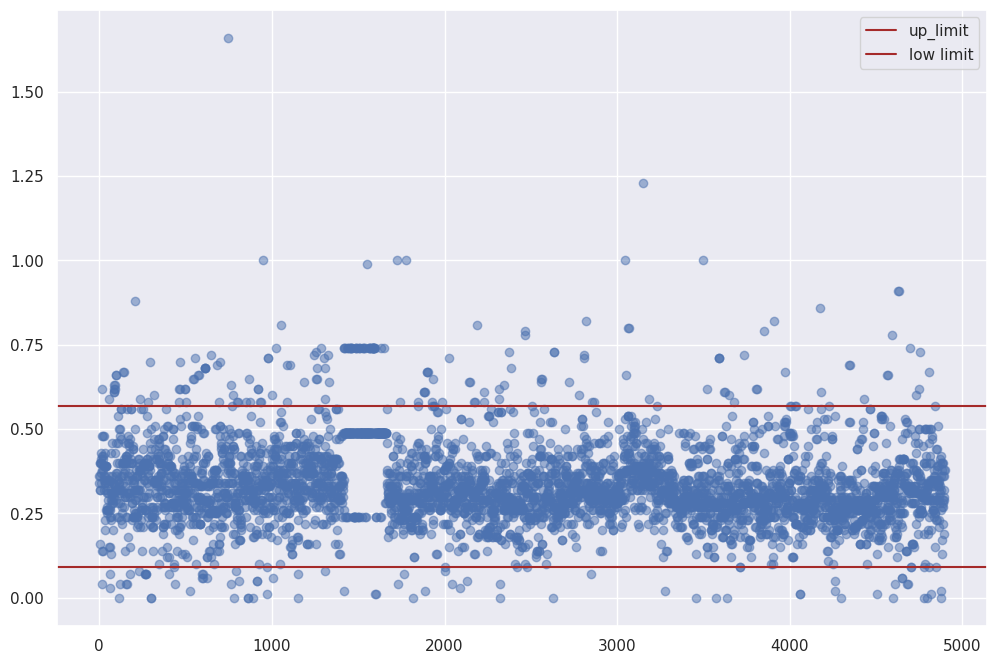

Creazione del grafico per la colonna di white_wine: residual_sugar


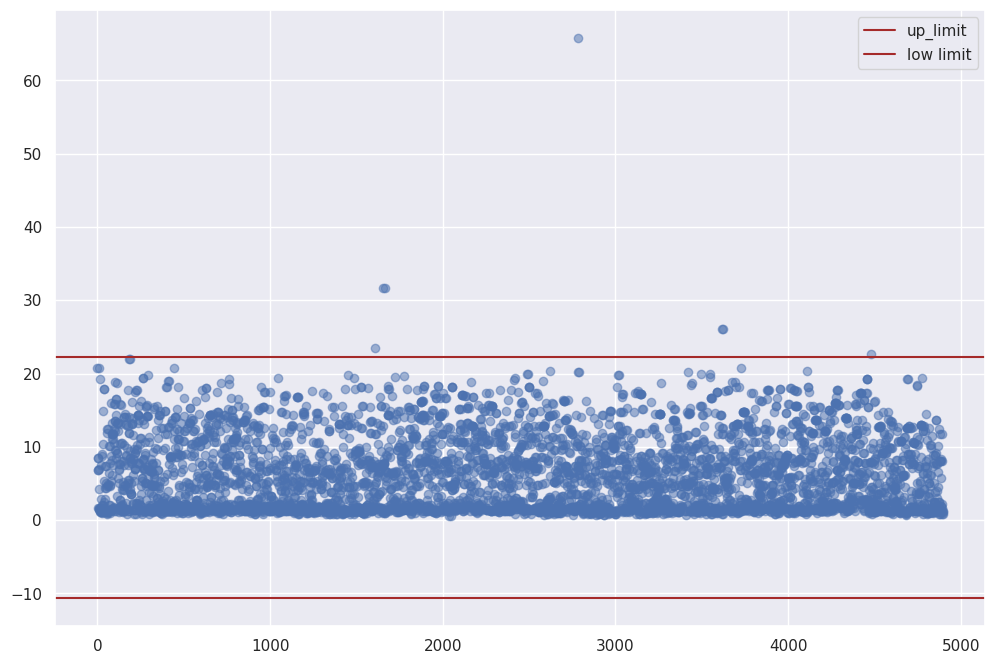

Creazione del grafico per la colonna di white_wine: chlorides


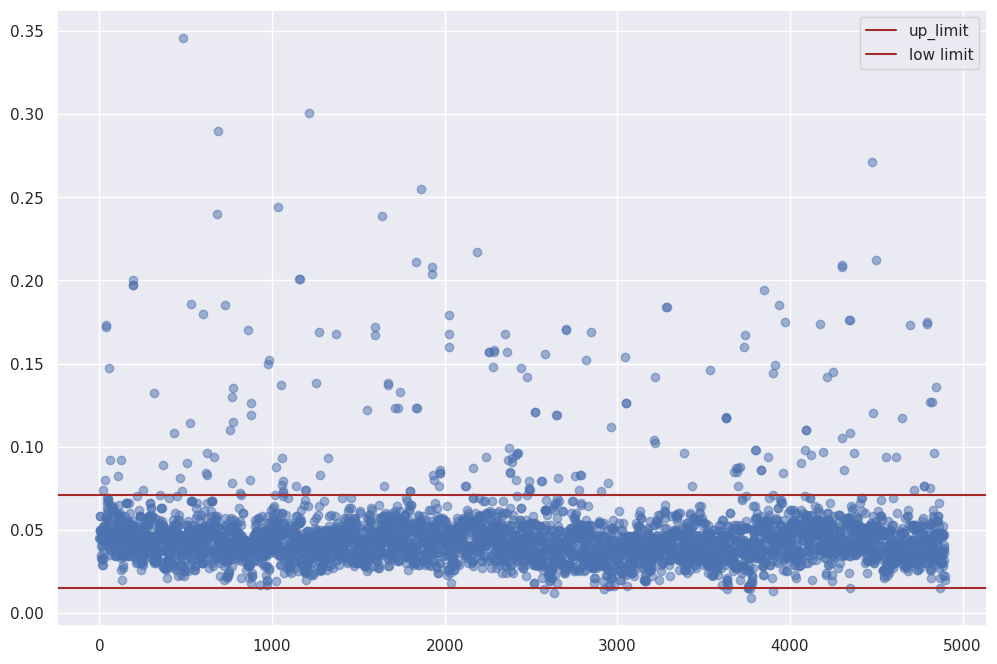

Creazione del grafico per la colonna di white_wine: free_sulfur_dioxide


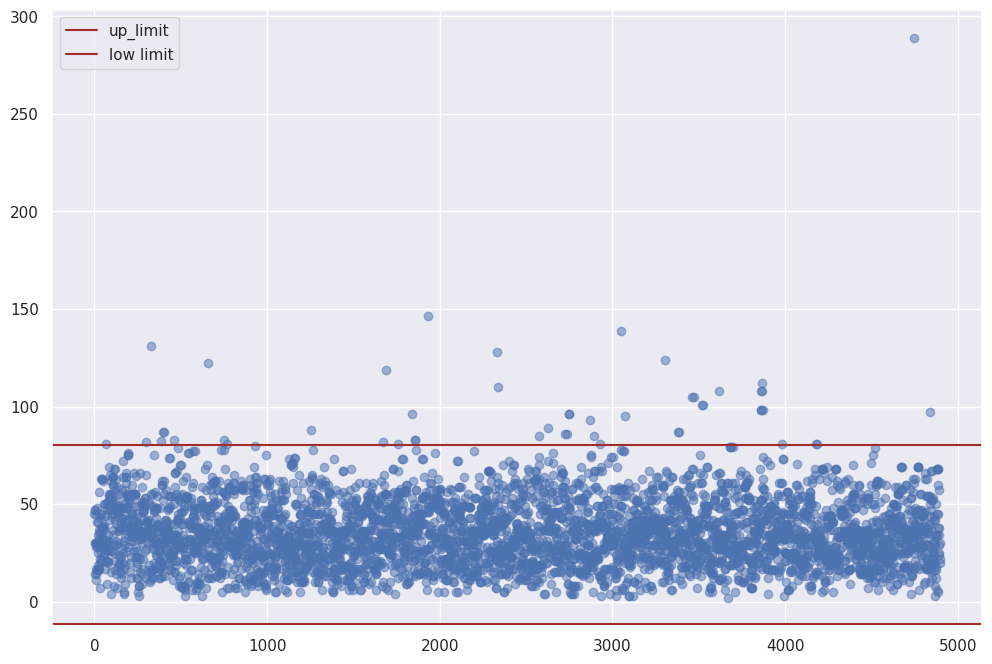

Creazione del grafico per la colonna di white_wine: total_sulfur_dioxide


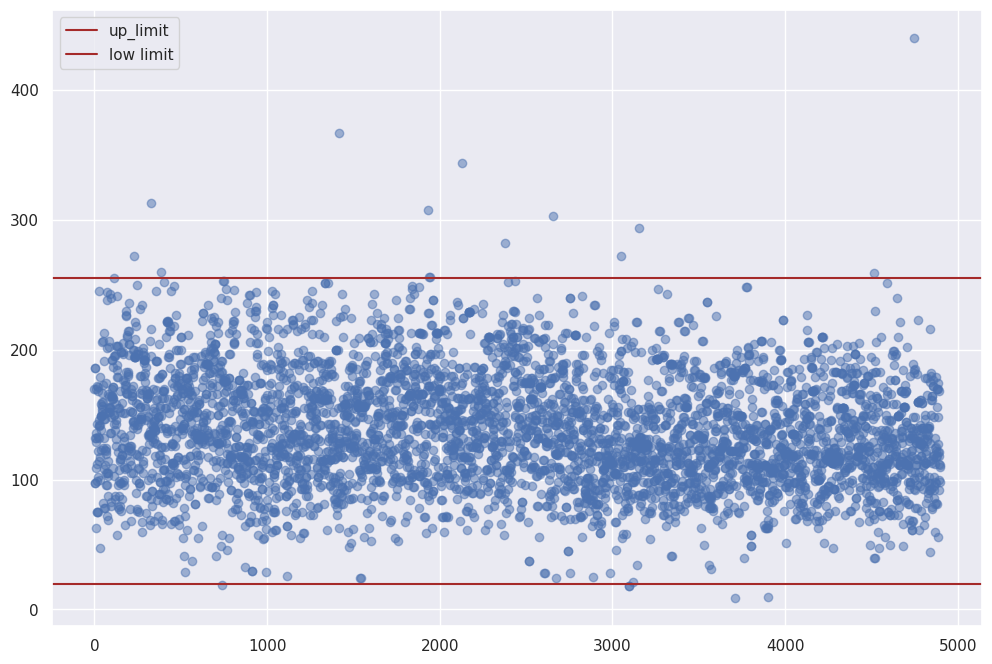

Creazione del grafico per la colonna di white_wine: density


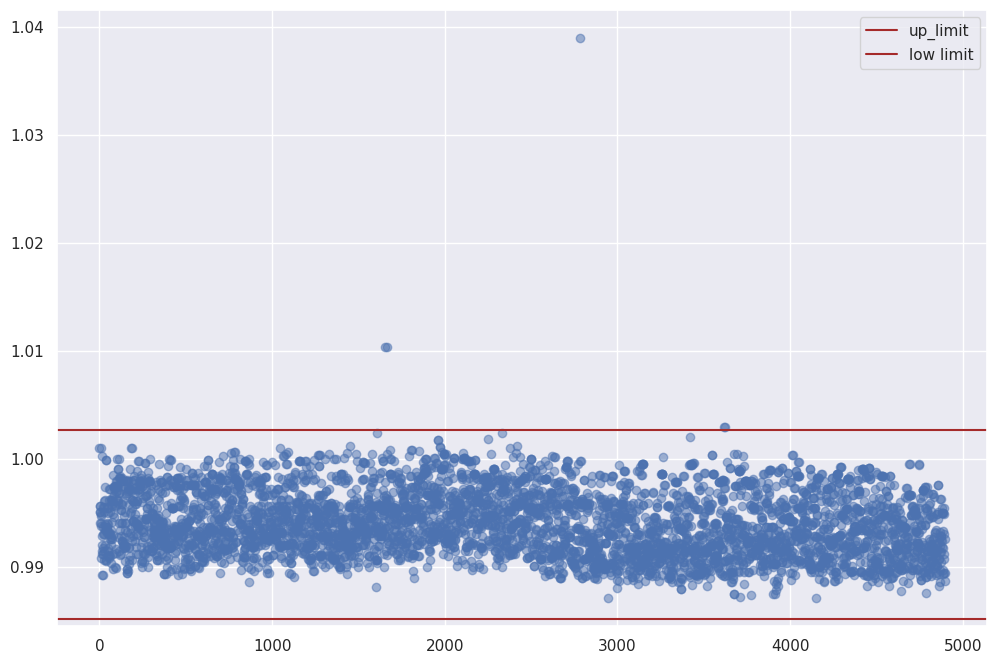

Creazione del grafico per la colonna di white_wine: pH


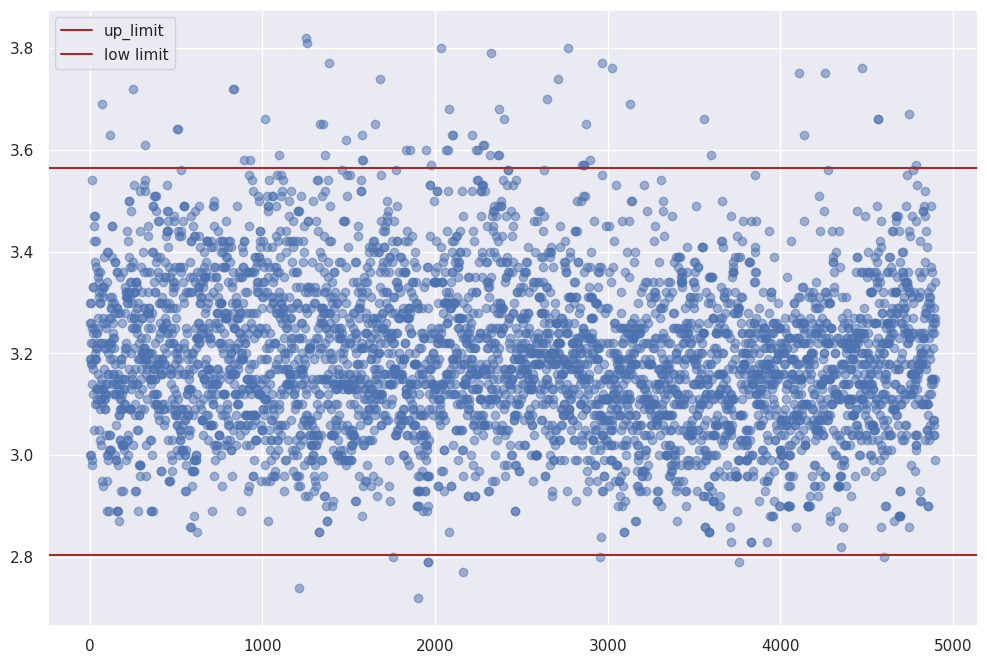

Creazione del grafico per la colonna di white_wine: sulphates


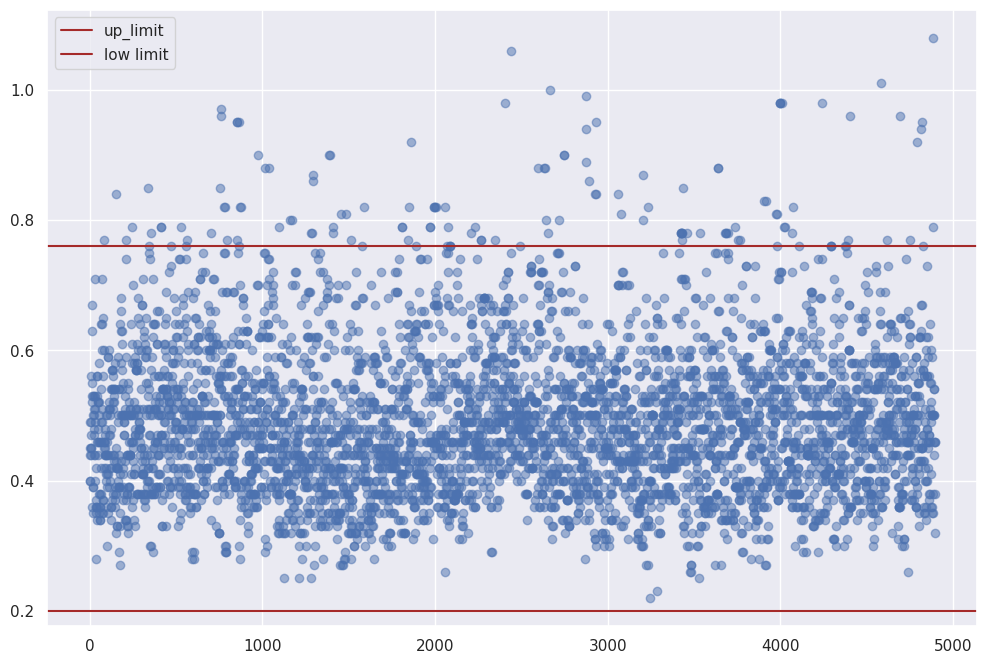

Creazione del grafico per la colonna di white_wine: alcohol


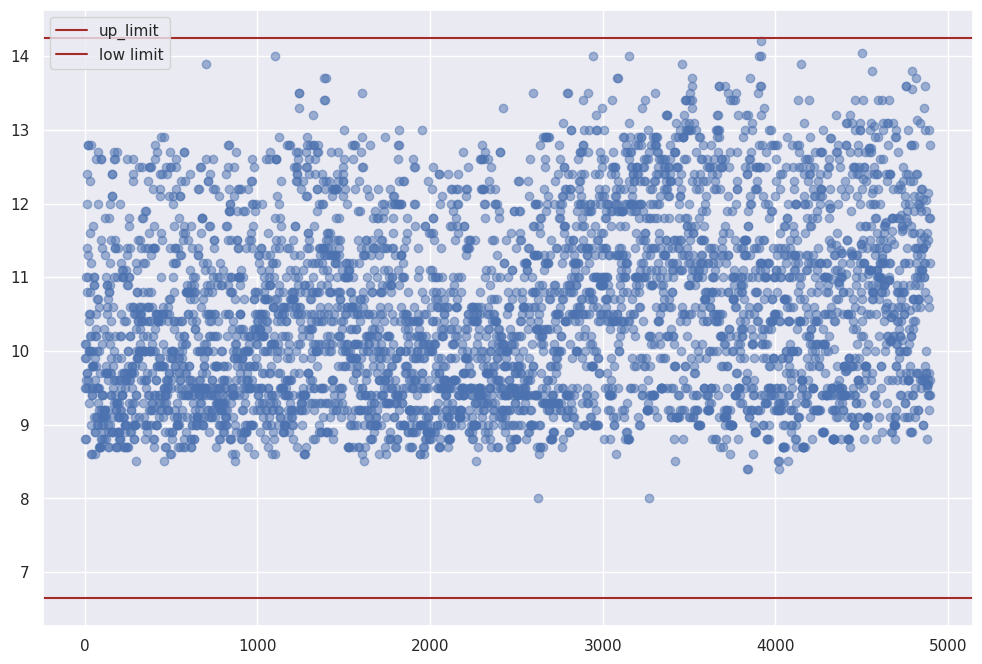

Creazione del grafico per la colonna di white_wine: quality


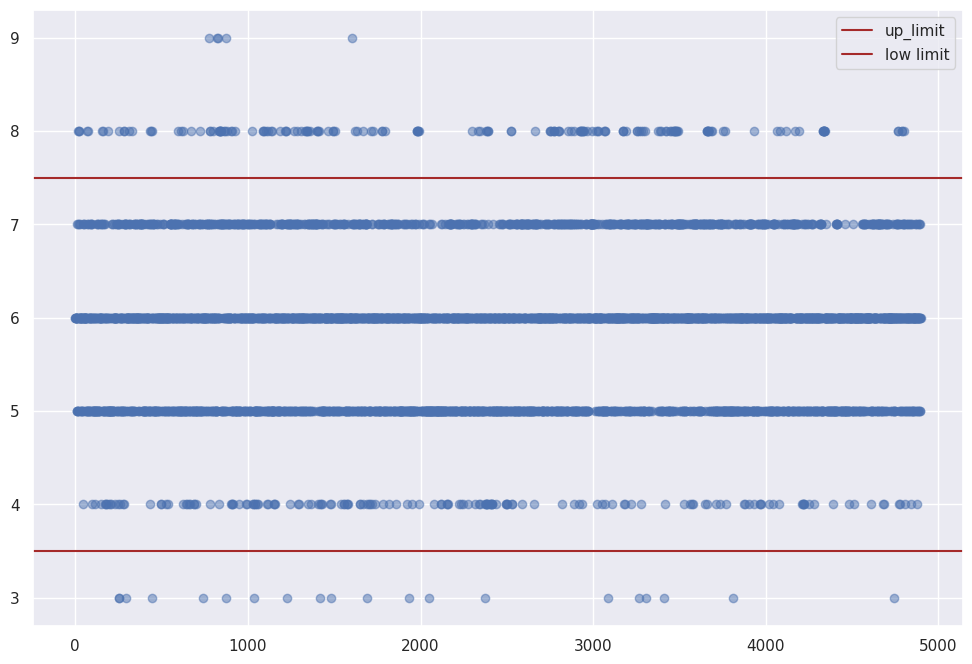

In [ ]:
for column in df_white_wine.columns:
    data = df_white_wine[column]
    up_limit, low_limit = interquartile_range_limits(data)
    # Calcola i limiti dello scarto interquartile per i dati di quella colonna
    print(f"Creazione del grafico per la colonna di white_wine: {column}")
    # Crea un grafico a dispersione per i dati di quella colonna, con i limiti dello scarto interquartile
    plot_generic_distribution(data, up_limit, low_limit)

Martrice delle correlazioni


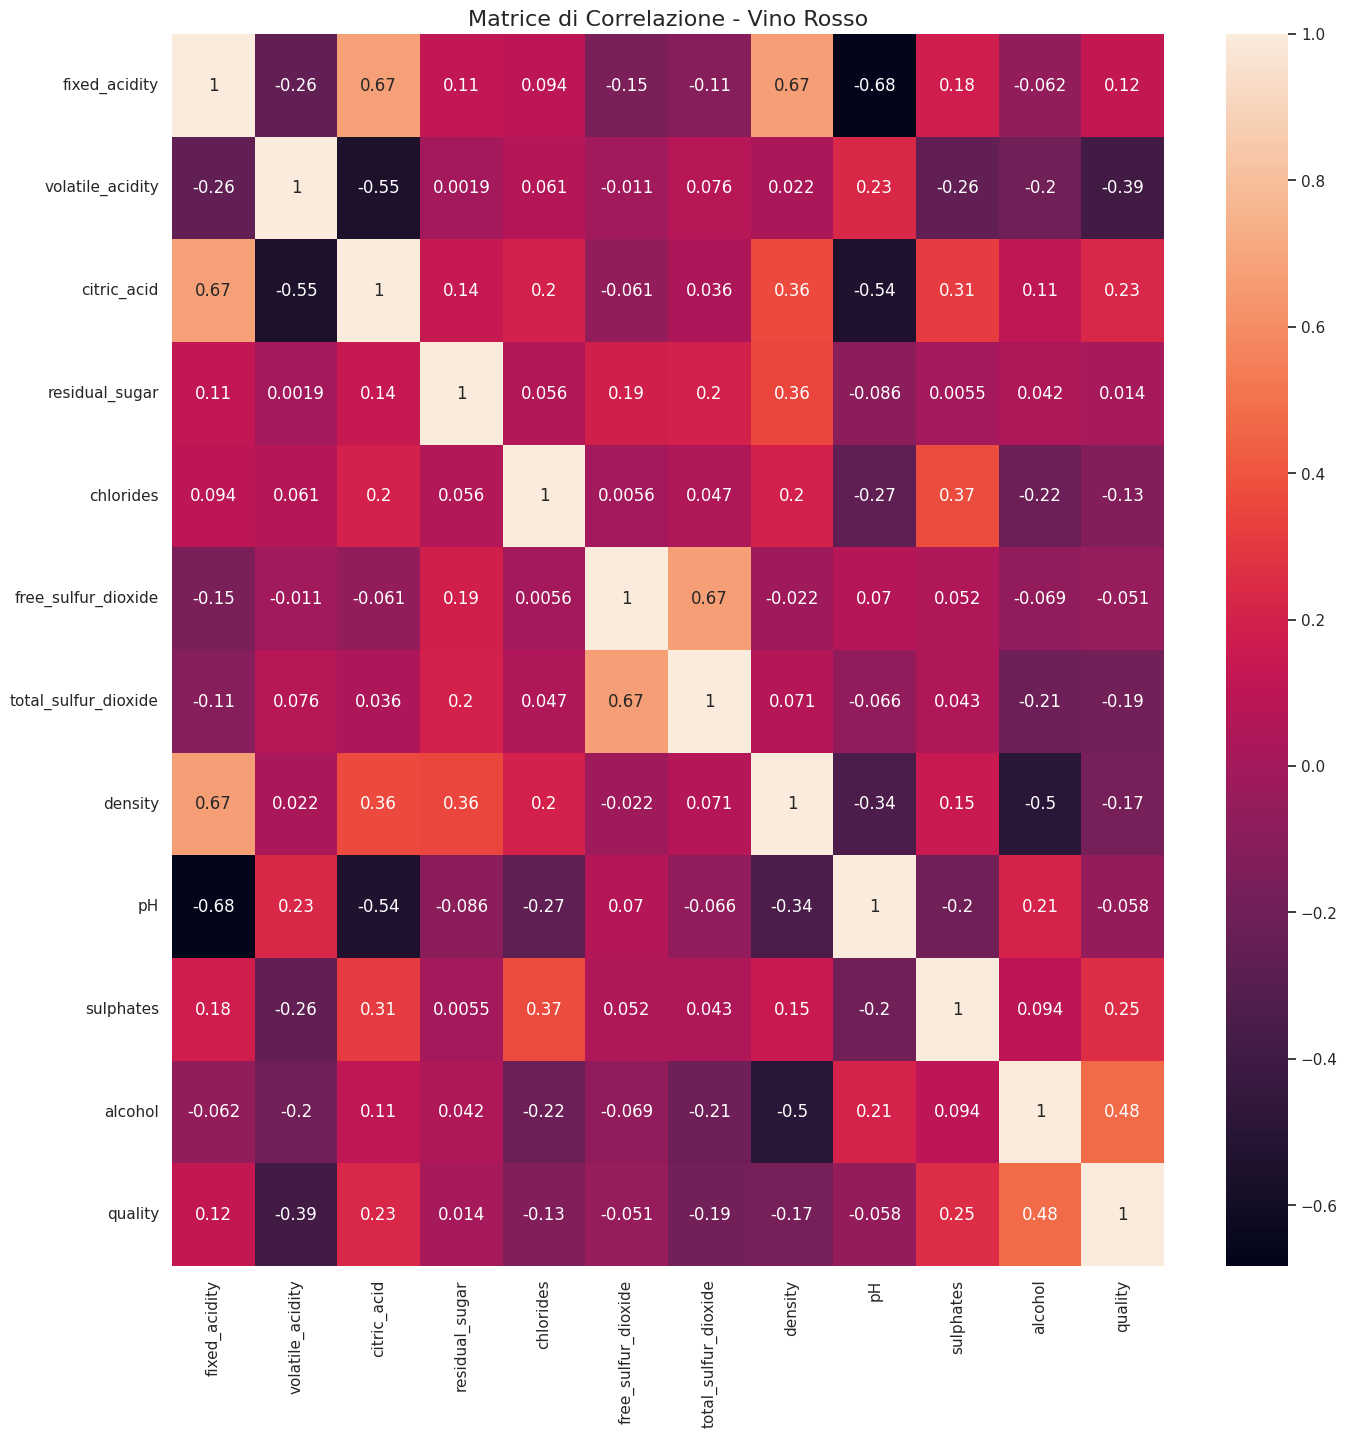

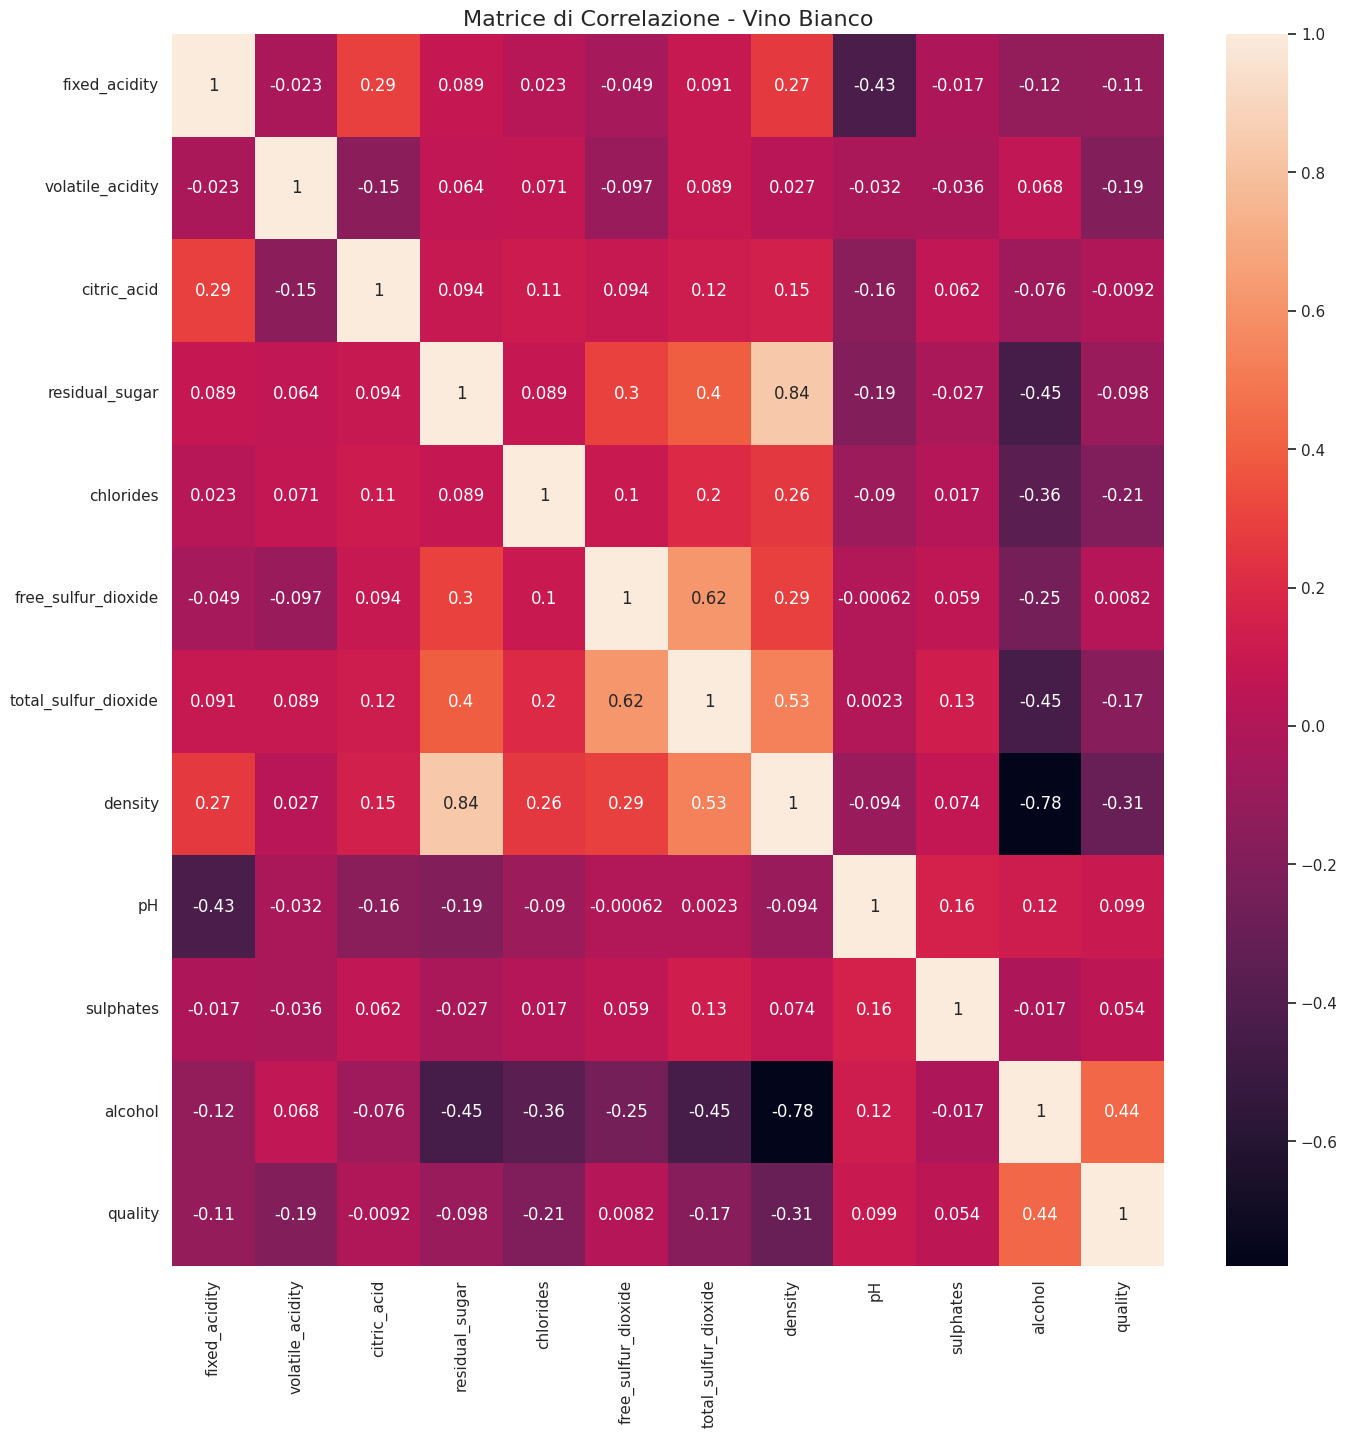

In [ ]:
# matrice di correlazione
corr_matrix_red_wine = df_red_wine.corr()
corr_matrix_white_wine = df_white_wine.corr()

# plot white_wine
plt.figure(figsize=(16, 16))
sns.heatmap(corr_matrix_red_wine, annot=True)
plt.title('Matrice di Correlazione - Vino Rosso', fontsize=16)  # Aggiungo il titolo
plt.show()

# plot white_wine
plt.figure(figsize=(16, 16))
sns.heatmap(corr_matrix_white_wine, annot=True)
plt.title('Matrice di Correlazione - Vino Bianco', fontsize=16)  # Aggiungo il titolo
plt.show()

Correlazione Feature-Labels

In [ ]:
# Calcola la correlazione delle colonne rispetto alla colonna 'quality' e ordina in modo decrescente
corr_fl_red_wine = corr_matrix_red_wine['quality'].sort_values(ascending=False)

# Visualizza la serie di correlazioni
display(corr_fl_red_wine)

# Aggiungi un titolo per la visualizzazione del vino rosso
print("Correlazione delle colonne rispetto a 'quality' - Vino Rosso")

# Calcola la correlazione delle colonne rispetto alla colonna 'quality' e ordina in modo decrescente
corr_fl_white_wine = corr_matrix_white_wine['quality'].sort_values(ascending=False)

# Visualizza la serie di correlazioni
display(corr_fl_white_wine)


# Aggiungi un titolo per la visualizzazione del vino bianco
print("Correlazione delle colonne rispetto a 'quality' - Vino Bianco")

quality                 1.000000
alcohol                 0.476166
sulphates               0.251397
citric_acid             0.226373
fixed_acidity           0.124052
residual_sugar          0.013732
free_sulfur_dioxide    -0.050656
pH                     -0.057731
chlorides              -0.128907
density                -0.174919
total_sulfur_dioxide   -0.185100
volatile_acidity       -0.390558
Name: quality, dtype: float64

Correlazione delle colonne rispetto a 'quality' - Vino Rosso


quality                 1.000000
alcohol                 0.435575
pH                      0.099427
sulphates               0.053678
free_sulfur_dioxide     0.008158
citric_acid            -0.009209
residual_sugar         -0.097577
fixed_acidity          -0.113663
total_sulfur_dioxide   -0.174737
volatile_acidity       -0.194723
chlorides              -0.209934
density                -0.307123
Name: quality, dtype: float64

Correlazione delle colonne rispetto a 'quality' - Vino Bianco



DATA SPLIT

Selezione feautures lables

In [ ]:
df_red_wine['wine_type'] = 0  # 0 per vino rosso
df_white_wine['wine_type'] = 1  # 1 per vino bianco

df = pd.concat([df_red_wine, df_white_wine])
X = df.drop("quality", axis=1).values
Y = df["quality"].values

In [ ]:
from sklearn.model_selection import train_test_split
# pipeline
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

# validazione
from sklearn.model_selection import learning_curve
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# ottimizzazione
from sklearn.model_selection import GridSearchCV

Funzione di validazione

In [ ]:
# testa e valida una pipeline generica
def pipeline_validation(pipeline, x, y):
    # split
    x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.2)

    # trainging
    pipeline.fit(x_train, y_train)

    # predict
    y_pred = pipeline.predict(x_val)

    # error test
    mse = mean_squared_error(y_val, y_pred)
    r2  = r2_score(y_val, y_pred)

    scores_df = pd.DataFrame({'rmse': [np.sqrt(mse)], 'r2': [r2]})
    display(scores_df)
    print("\n")

Cross Validation e Learning Curve

In [ ]:
def plot_learning_curve(pipeline, x, y):

  x_len = len(X)
  train_size_60 = int((x_len * 60) / 100)
  train_size_70 = int((x_len * 70) / 100)
  train_size_80 = int((x_len * 80) / 100)

  train_sizes = [train_size_60, train_size_70, train_size_80]

  train_size_abs, train_scores, valid_scores = learning_curve(pipeline,
                                                           x,
                                                           y,
                                                           train_sizes = train_sizes)

  train_mean = np.mean(train_scores, axis=1)
  valid_mean = np.mean(valid_scores, axis=1)


  scores_df = pd.DataFrame({'train': train_mean, 'validation': valid_mean})
  display(scores_df)

  plt.figure(figsize=(12, 8))
  plt.plot(train_size_abs, train_mean, color='blue', marker='o', markersize=5, label='Training Accuracy')
  plt.plot(train_size_abs, valid_mean, color='red', marker='o', markersize=5, label='CrossValidation Accuracy')
  plt.legend()
  plt.show()

Ricerca

rmse        r2
0  0.717833  0.327702

train  validation
0  0.310420    0.237781
1  0.307563    0.242429
2  0.298778    0.248954

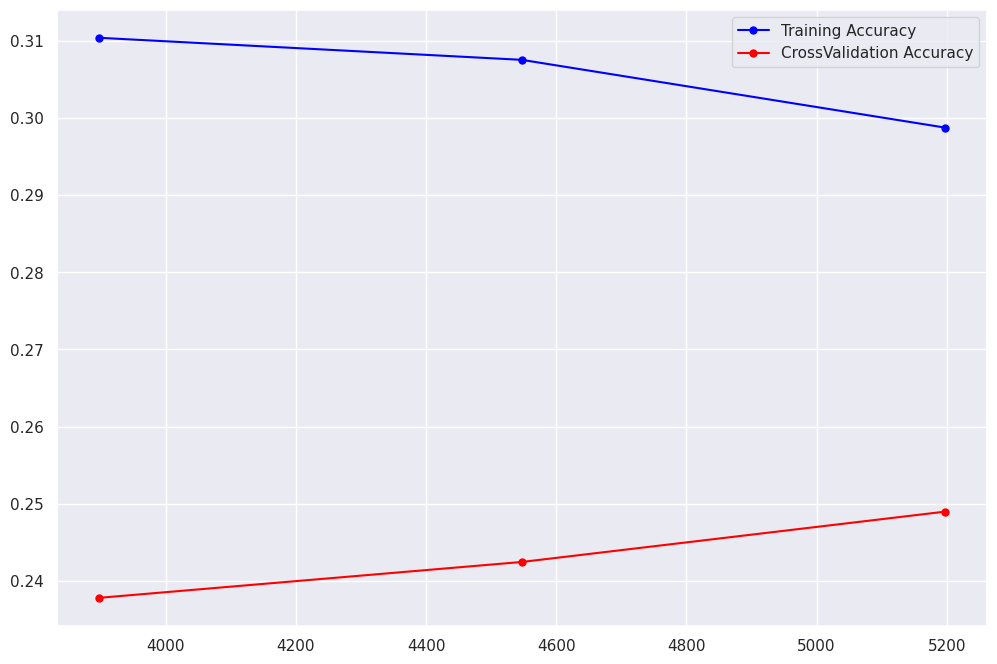

In [ ]:
# test 1
pipeline_validation(make_pipeline(StandardScaler(), LinearRegression()), X, Y)
plot_learning_curve(make_pipeline(StandardScaler(), LinearRegression()), X, Y)


Il modello va in overfitting a causa della non linearità del dataset.
In questi casi si applica la regressione polinominale.

rmse        r2
0  2.199615 -5.511493

train  validation
0  0.508903   -7.296520
1  0.496915   -8.620714
2  0.481036   -2.111077

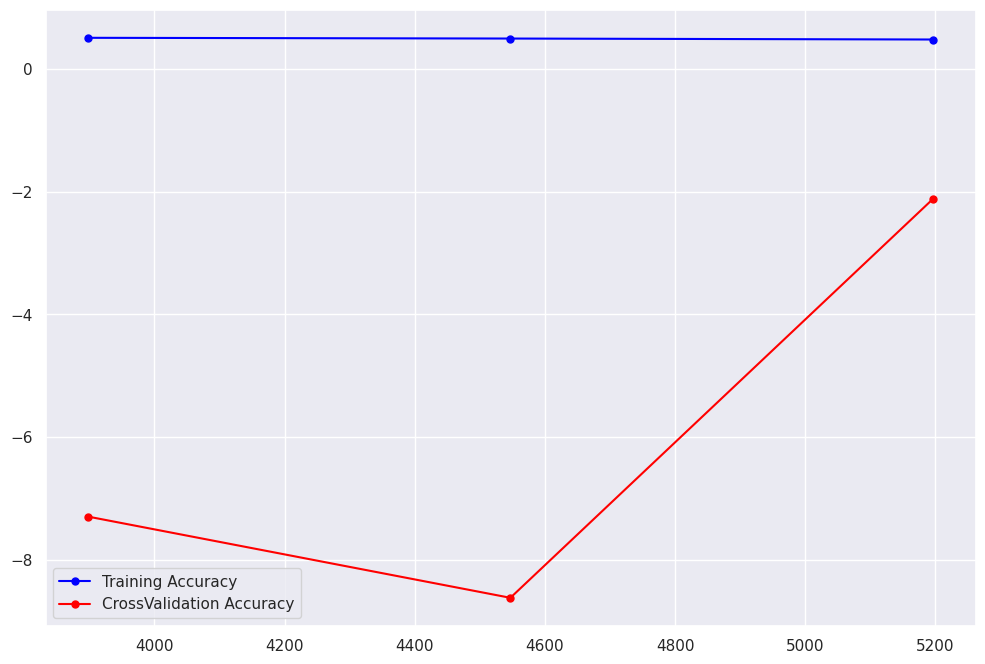

In [ ]:
# test 2
pipeline_validation(make_pipeline(StandardScaler(), PolynomialFeatures(degree = 3), LinearRegression()), X, Y)
plot_learning_curve(make_pipeline(StandardScaler(), PolynomialFeatures(degree = 3), LinearRegression()), X, Y)

In [ ]:
# visualizza gli errori accumulati durante
# un processo di validazione iterativo
def plot_errors_curves(mse_errors, r2_errors, y):
  max_y = np.max(y)
  min_y = np.min(y)
  plt.figure(figsize=(12, 8))
  plt.axhline(max_y, color = 'brown', linestyle = '-', label = f'max y={max_y}')
  plt.plot(np.sqrt(mse_errors), "b", label= 'rmse')
  plt.axhline(min_y, color = 'brown', linestyle = '-', label = f'min y={min_y}')
  plt.legend()
  plt.show()

  plt.figure(figsize=(12, 8))
  plt.plot(r2_errors, "g", label="r2")
  plt.legend()
  plt.show()



# testa e valida una pipeline con regressione polinominale
def pipeline_poly_validation(regressor, x, y, n):
  # split
  x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.2)

  mse_errors = np.zeros(n - 1)
  r2_errors  = np.zeros(n - 1)


  for i in range(1,n):
    pipe = make_pipeline(StandardScaler(), PolynomialFeatures(degree = i), regressor)

    # training
    pipe.fit(x_train, y_train)

    # predict
    y_pred = pipe.predict(x_val)

    # error test
    mse = mean_squared_error(y_val, y_pred)
    r2  = r2_score(y_val, y_pred)

    print("Grado:", i, " - MSE:", mse, " - R2:", r2)
    mse_errors[i - 1] = mse
    r2_errors[i - 1] = r2

  plot_errors_curves(mse_errors, r2_errors, y_val)

Grado: 1  - MSE: 0.542629494081733  - R2: 0.28121164130795295
Grado: 2  - MSE: 0.49458602324751577  - R2: 0.34485191136963667


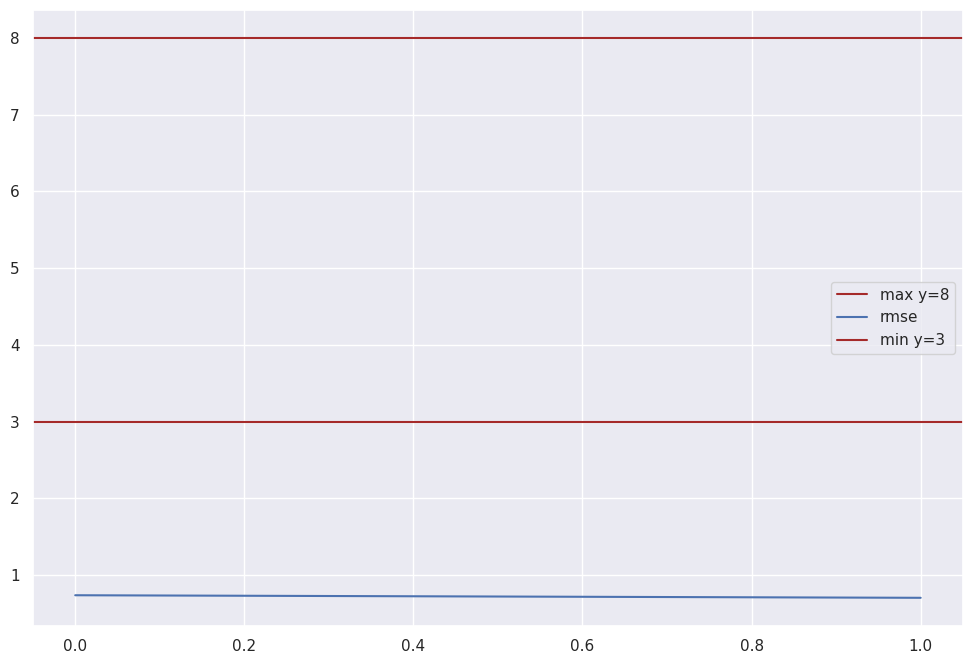

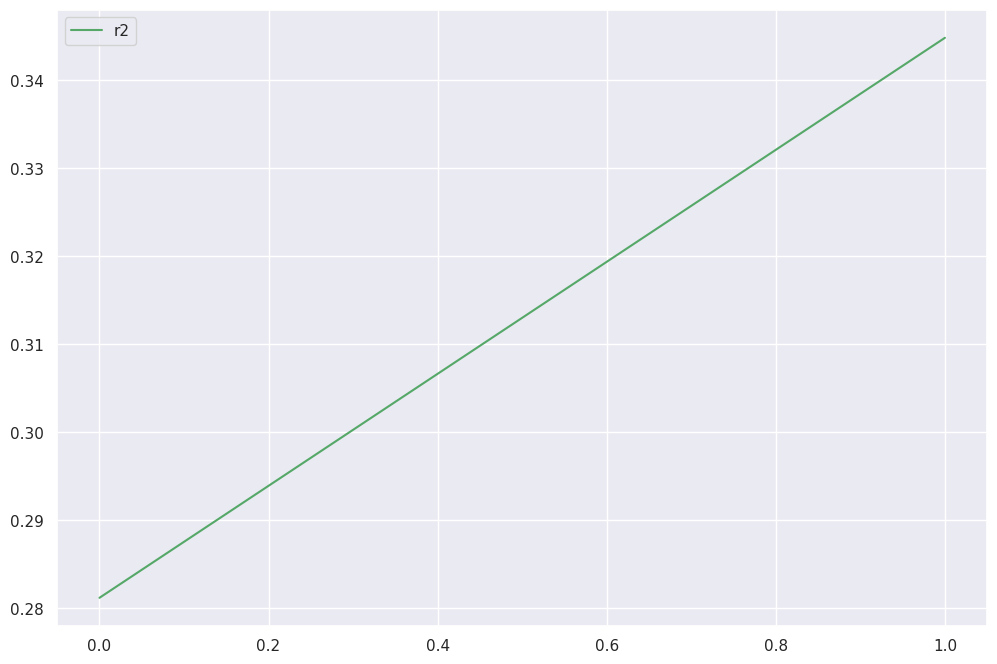

In [ ]:
pipeline_poly_validation(LinearRegression(), X, Y, 3)

Regolarizzazione

rmse       r2
0  0.852921  0.04626

train  validation
0  0.506591   -6.415405
1  0.494832   -4.850802
2  0.479124   -1.423905

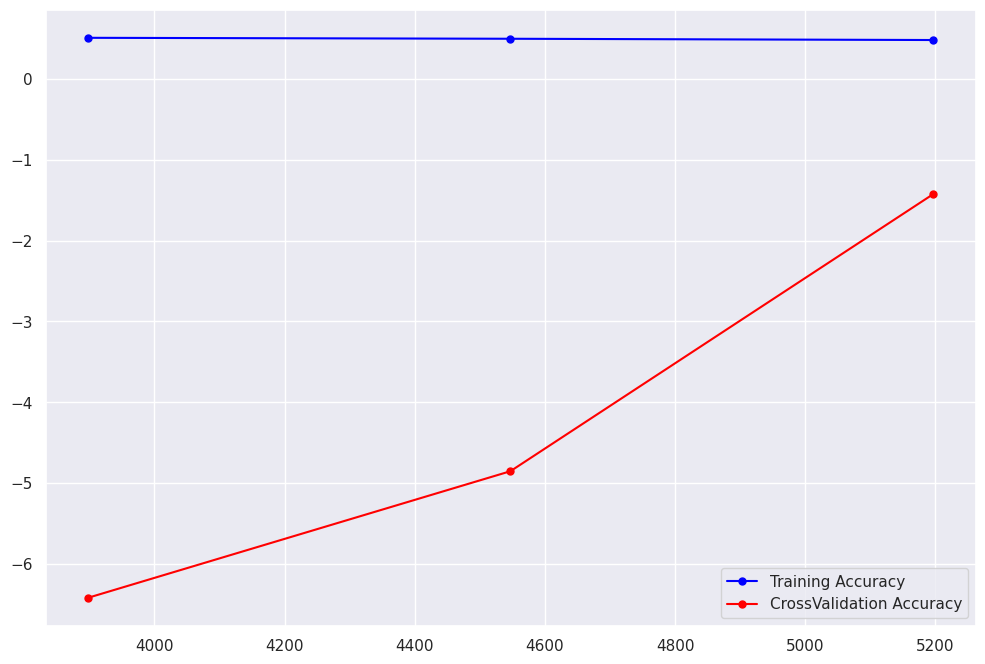

In [ ]:
from sklearn.linear_model import Ridge

pipeline_validation(make_pipeline(StandardScaler(), PolynomialFeatures(degree = 3), Ridge()), X, Y)
plot_learning_curve(make_pipeline(StandardScaler(), PolynomialFeatures(degree = 3), Ridge()), X, Y)

Grado: 1  - MSE: 0.5634175941831773  - R2: 0.27978690000978035
Grado: 2  - MSE: 0.5224023565284679  - R2: 0.33221641545819214
Grado: 3  - MSE: 0.6018465928067147  - R2: 0.2306633573410375
Grado: 4  - MSE: 3.721697315645618  - R2: -3.7574218281421965


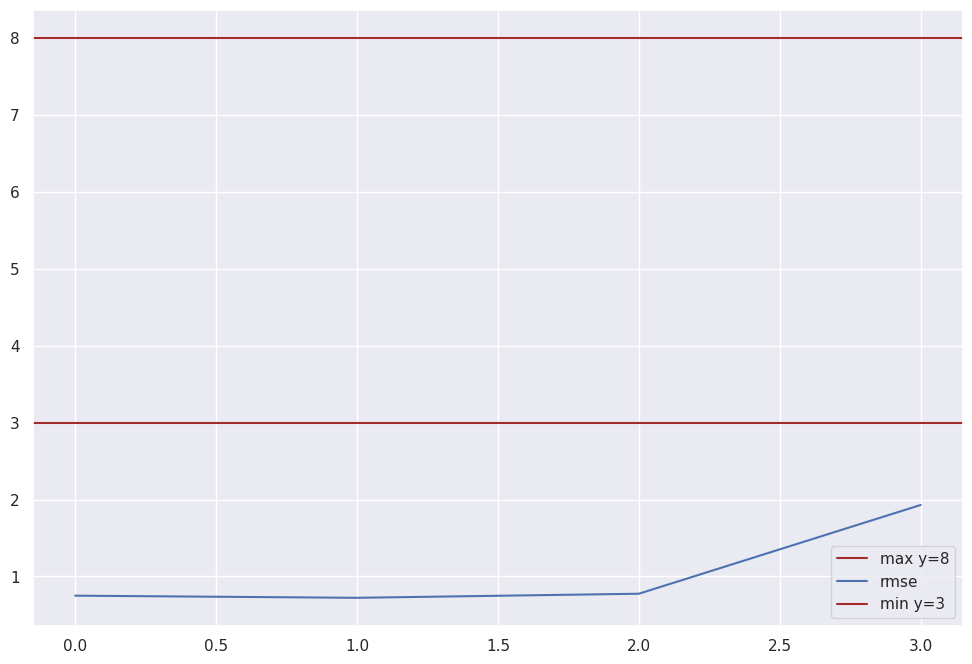

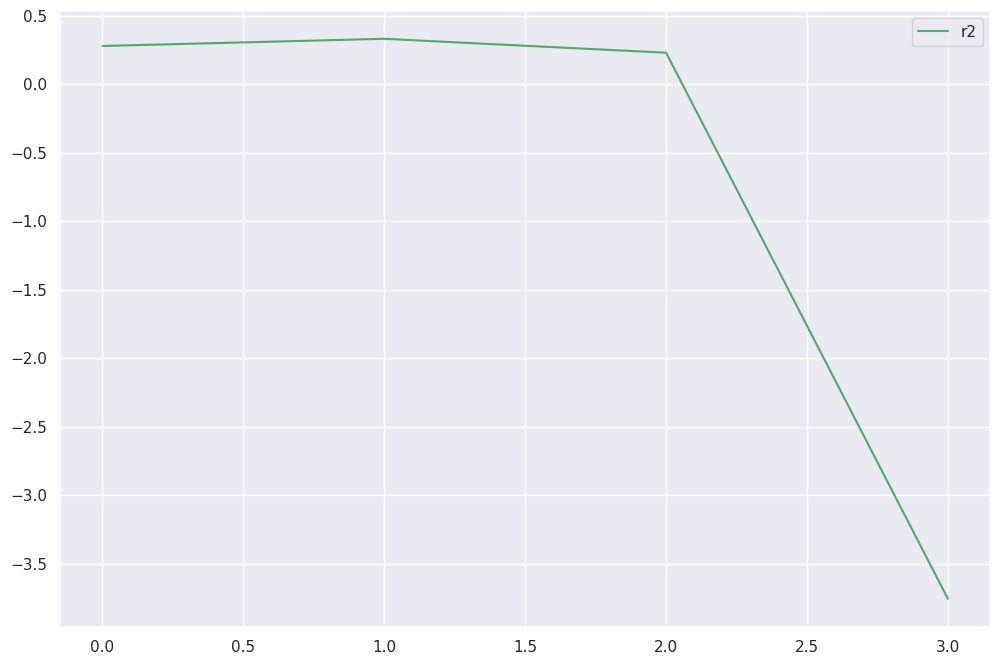

In [ ]:
pipeline_poly_validation(Ridge(), X, Y, 5)

test pipeline

In [ ]:
def test_pipeline_ridge( x, y, polyDegree, maxAlpha):
  # split
  x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.2)

  mse_errors = np.zeros(maxAlpha - 1)
  r2_errors  = np.zeros(maxAlpha - 1)


  for i in range(1,maxAlpha):
    pipe = make_pipeline(StandardScaler(), PolynomialFeatures(degree = polyDegree), Ridge(alpha=i))

    # training
    pipe.fit(x_train, y_train)

    # predict
    y_pred = pipe.predict(x_val)

    # error test
    mse = mean_squared_error(y_val, y_pred)
    r2  = r2_score(y_val, y_pred)
    print("Grado:", i, " - MSE:", mse, " - R2:", r2)
    mse_errors[i - 1] = mse
    r2_errors[i - 1] = r2

  plot_errors_curves(mse_errors, r2_errors, y_val)

Grado: 1  - MSE: 0.5776729873740869  - R2: 0.27300206745809796
Grado: 2  - MSE: 0.577492788286012  - R2: 0.2732288469117674
Grado: 3  - MSE: 0.5772550350167702  - R2: 0.27352805795152824
Grado: 4  - MSE: 0.5769911606377645  - R2: 0.2738601422486665
Grado: 5  - MSE: 0.5767178594320983  - R2: 0.27420409014968183
Grado: 6  - MSE: 0.5764441224996717  - R2: 0.27454858641016844
Grado: 7  - MSE: 0.57617475668557  - R2: 0.2748875816448937
Grado: 8  - MSE: 0.5759122328210603  - R2: 0.27521796632777296
Grado: 9  - MSE: 0.5756576951492228  - R2: 0.275538300435866


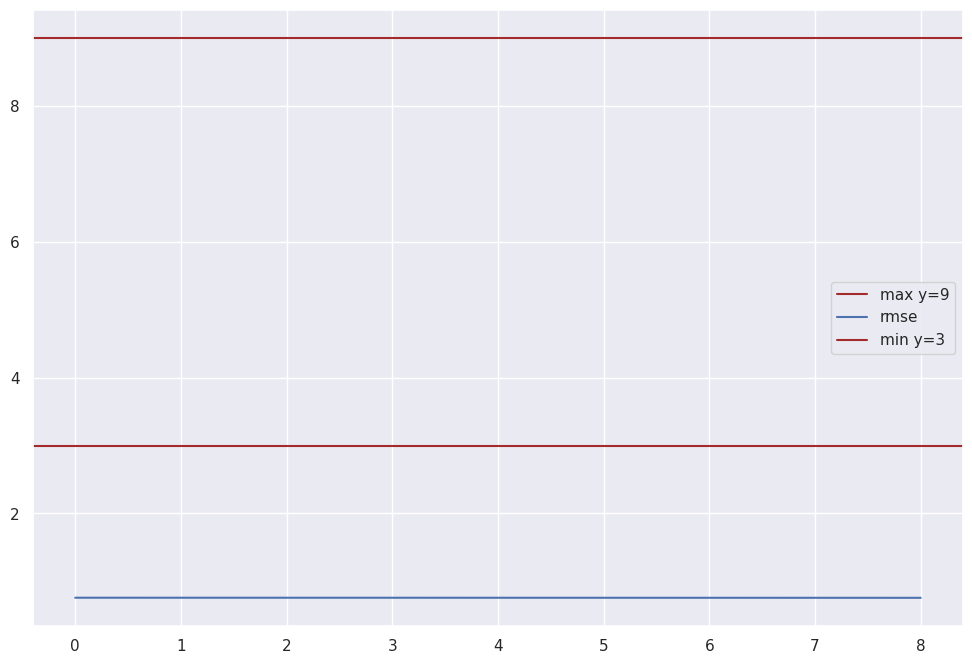

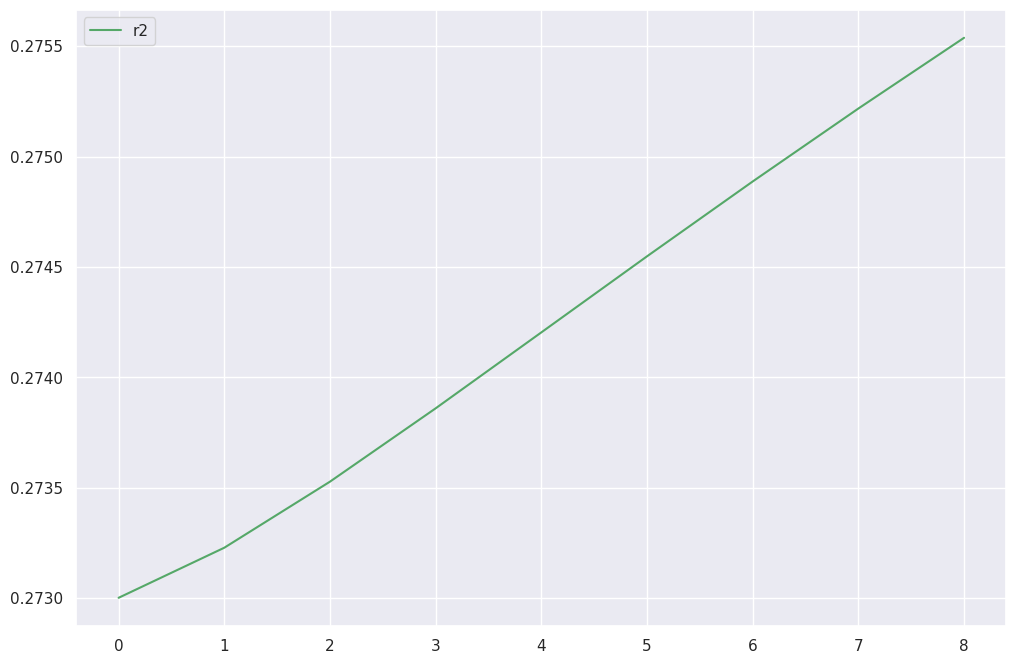

In [ ]:
test_pipeline_ridge(X, Y, 2, 10)


Ottimizzazione

In [ ]:

def ottimization( x, y):
  # split
  x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.2)

  pipe = make_pipeline(StandardScaler(), PolynomialFeatures(), Ridge())

  grid_parameter = {
      'polynomialfeatures__degree': [1, 2 , 3],
      'ridge__alpha': [0.0001, 0.001, 0.01, 0.1, 1., 10.],
      'ridge__fit_intercept': [True, False]
      }

  grid_search = GridSearchCV(pipe, grid_parameter)
  grid_search.fit(x_train, y_train)

  print("MIGLIOR SCORE: ", grid_search.best_score_)
  print("I MIGLIORI IPERPARAMETRI: ", grid_search.best_params_)

  return grid_search.best_params_["polynomialfeatures__degree"], \
         grid_search.best_params_["ridge__alpha"], \
         grid_search.best_params_["ridge__fit_intercept"]


In [ ]:
poly_degree, ridge_alpha, ridge_intercept = ottimization(X, Y)

MIGLIOR SCORE:  0.31735643181900375
I MIGLIORI IPERPARAMETRI:  {'polynomialfeatures__degree': 2, 'ridge__alpha': 10.0, 'ridge__fit_intercept': False}


Test

In [117]:
def test_plot(test, pred):
  # andamento valori reali e valori predetti
  plt.figure(figsize=(10, 8))
  plt.plot(np.arange(test.size), test,  alpha=0.8, label="valori reali")
  plt.plot(np.arange(pred.size), pred, alpha=0.8, label="valori predetti")
  plt.legend()
  plt.show()

  # andamento media mobile valori reali e valori predetti
  r = 20
  maverage_y_test = pd.Series(test).rolling(r).mean()
  maverage_y_pred = pd.Series(pred).rolling(r).mean()

  plt.figure(figsize=(10, 8))
  plt.plot(np.arange(maverage_y_test.size), maverage_y_test,  alpha=0.8, label="valori reali")
  plt.plot(np.arange(maverage_y_pred.size), maverage_y_pred, alpha=0.8, label="valori predetti")
  plt.show()

  # varianza tra valori reali e valori predetti
  plt.figure(figsize=(10, 8))
  plt.scatter(test, pred)
  plt.show()


In [118]:

def test_model(x, y):
  # [1] split
  x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

  # [2] pipeline
  pipe = make_pipeline(StandardScaler(),
                      PolynomialFeatures(degree=poly_degree),
                      Ridge(alpha=ridge_alpha, fit_intercept=ridge_intercept))

  # [3] training
  pipe.fit(x_train, y_train)


  # [3] test
  y_pred = pipe.predict(x_test)


  # [4] error
  mse = mean_squared_error(y_test, y_pred)
  r2 = r2_score(y_test, y_pred)

  scores_df = pd.DataFrame({'rmse': [np.sqrt(mse)], 'r2': [r2]})
  display(scores_df)
  print("\n")

  test_plot(y_test, y_pred)


rmse        r2
0  0.774544  0.237565

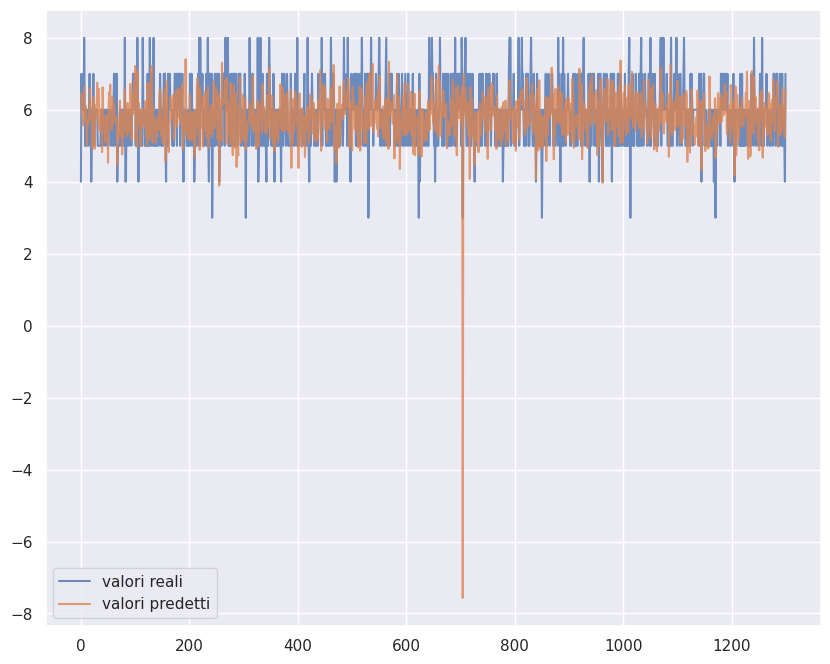

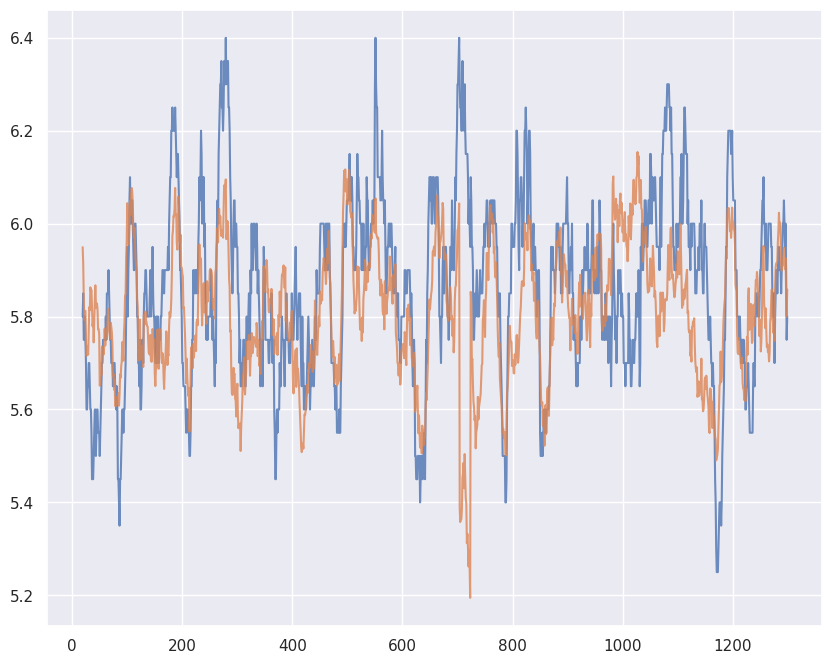

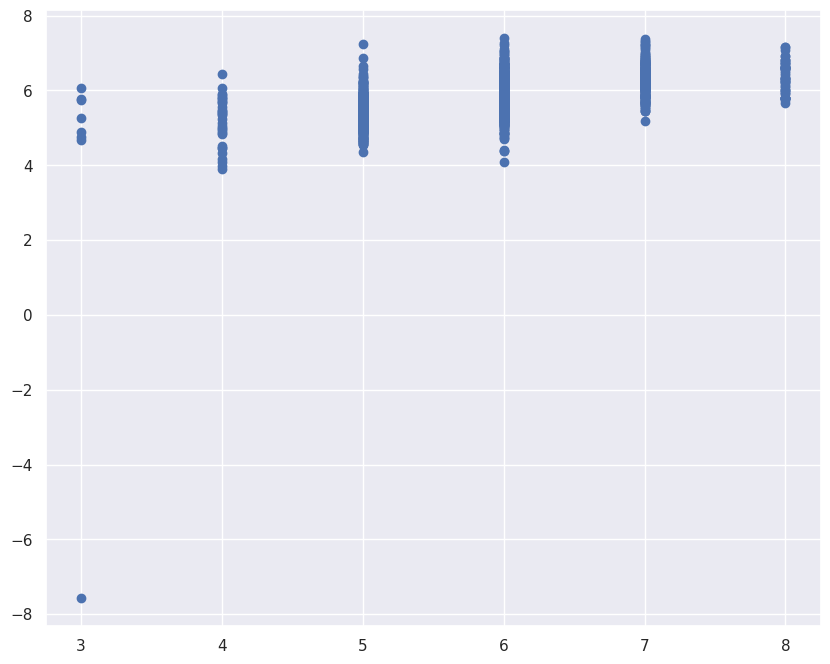

In [119]:
test_model(X, Y)

Deploy

In [ ]:
# installazione di  sklearn2pmml
!pip install sklearn2pmml

#installazione pypmml
!pip install pypmml


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 19.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 13.6 MB/s eta 0:00:00
  Created wheel for sklearn2pmml: filename=sklearn2pmml-0.99.2-py3-none-any.whl size=7064121 sha256=c7d486f8153303791d09c6dac58769c66f936b1665f6b0d208bdfcb33b4528b3
  Stored in directory: /root/.cache/pip/wheels/81/1d/57/ea16b839a5db69e1ae5d92bf22711dff54fe127f4f74c3f346
Successfully built sklearn2pmml
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.2/14.2 MB 40.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pypmml: filename=pypmml-0.9.17-py3-none-any.whl size=14215032 sha256=f4eea6c9d9ca1f2a5a4eb644bdbd6b81c9548e40ed8e42290b65e393587cabd3
  Stored in directory: /root/.cache/pip/wheels/8c/74/f1/946a04acaa6de2e9df0f02739511aba5a7aac52383c52ac900
Successfully built pypmml


In [122]:
from sklearn2pmml import sklearn2pmml
from sklearn2pmml.pipeline import PMMLPipeline



def save_model():
  # sklearn2pmml vuole feature e labels come dataframe
  # con i nomi associati alle colonne
  X = df.drop("quality", axis=1)
  Y = df["quality"]
  x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)


  # [1] train final model
  slc   = StandardScaler()
  poly  = PolynomialFeatures(degree=poly_degree)
  ridge = Ridge(alpha=ridge_alpha, fit_intercept=ridge_intercept)

  pmml_pipe = PMMLPipeline(steps=[ ("slc", slc),
                              ("poly", poly),
                              ("ridge", ridge)] )
  pmml_pipe.fit(x_train, y_train)


  # ===========
  # [2] OUT
  # ============
  sklearn2pmml(pmml_pipe, "wines_true.pmml", with_repr = True)


save_model()

Load

In [123]:
from pypmml import Model


new_df = pd.concat([df_red_wine, df_white_wine])
display(new_df)


# ==========
# [1] IN
# ==========
model = Model.fromFile('wines_true.pmml')

# ===============
# [2] PREDICT
# ===============
Y_pred = model.predict(new_df)

display(Y_pred)

fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
0               7.4              0.70         0.00             1.9      0.076   
1               7.8              0.88         0.00             2.6      0.098   
2               7.8              0.76         0.04             2.3      0.092   
3              11.2              0.28         0.56             1.9      0.075   
4               7.4              0.70         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
4893            6.2              0.21         0.29             1.6      0.039   
4894            6.6              0.32         0.36             8.0      0.047   
4895            6.5              0.24         0.19             1.2      0.041   
4896            5.5              0.29         0.30             1.1      0.022   
4897            6.0              0.21         0.38             0.8      0.020   

      free_sulfur_dioxide  total_sulfur_dioxide  density    pH  sulphates  \
0                    11.0                  34.0  0.99780  3.51       0.56   
1                    25.0                  67.0  0.99680  3.20       0.68   
2                    15.0                  54.0  0.99700  3.26       0.65   
3                    17.0                  60.0  0.99800  3.16       0.58   
4                    11.0                  34.0  0.99780  3.51       0.56   
...                   ...                   ...      ...   ...        ...   
4893                 24.0                  92.0  0.99114  3.27       0.50   
4894                 57.0                 168.0  0.99490  3.15       0.46   
4895                 30.0                 111.0  0.99254  2.99       0.46   
4896                 20.0                 110.0  0.98869  3.34       0.38   
4897                 22.0                  98.0  0.98941  3.26       0.32   

      alcohol  quality  wine_type  
0         9.4        5          0  
1         9.8        5          0  
2         9.8        5          0  
3         9.8        6          0  
4         9.4        5          0  
...       ...      ...        ...  
4893     11.2        6          1  
4894      9.6        5          1  
4895      9.4        6          1  
4896     12.8        7          1  
4897     11.8        6          1  

[6497 rows x 13 columns]

predicted_quality
0              4.911305
1              5.237575
2              5.285962
3              5.665258
4              4.911305
...                 ...
6492           6.070473
6493           5.655516
6494           5.290017
6495           6.630264
6496           6.305145

[6497 rows x 1 columns]